**Project Cold Response — Data Behind the Cure: Quantifying the Impact of Medicinal Plants in Snakebite Treatment.**

**TASK 1: Data Collection & Cleaning: Data were scraped, cleaned, and structured from research-based PDF documents using Jupyter Notebook.**

*Data scraped from these journals:
https://drive.google.com/file/d/17slb6NIfNfpkBajm8d1s2IDXcub3iOaZ/view?usp=sharing,
file:///C:/Users/hp/Desktop/PDF-folder/2025.08.08.25333277.full.pdf,
file:///C:/Users/hp/Desktop/PDF-folder/ADEBAYO-ANTHONY-ANTISNAKE.pdf,
file:///C:/Users/hp/Desktop/PDF-folder/ajol-file-journals_475_articles_141536_submission_proof_141536-5605-376722-1-10-20160805.pdf,
file:///C:/Users/hp/Desktop/PDF-folder/Assessing_the_Impact_of_Hospital_and_Traditional-b.pdf,
file:///C:/Users/hp/Desktop/PDF-folder/fgwh-6-1655068.pdf,
file:///C:/Users/hp/Desktop/PDF-folder/informit.T2025052300005791648997243.pdf,
file:///C:/Users/hp/Desktop/PDF-folder/R-0003BIOT.pdf,
file:///C:/Users/hp/Desktop/PDF-folder/s12887-025-05910-3.pdf*

**Data Simulator tool:https://www.yeschat.ai/gpts-2OToXX1jIx-Data-Simulator**

**Simulated data were generated using the Data Simulator GPT (ID: 2OToXX1jIx-Data-Simulator) tool hosted on YesChat.ai. Data generation followed the platform’s licensing and terms of service applicable as of October 20225.**

**Wikipedia: Scraping allowed under CC BY-SA 4.0 License**

**https://en.wikipedia.org/wiki/Wikipedia:Terms_of_use**


*Install all library dependencies*

In [2]:
import pdfplumber
import pandas as pd
import re
from typing import Dict, List, Optional
import numpy as np
import os
from pathlib import Path

class EnhancedSnakebiteDataExtractor:
    """Extract comprehensive snakebite treatment data from research PDFs"""
    
    def __init__(self, pdf_directory: str):
        self.pdf_directory = Path(pdf_directory)
        self.data_records = []
        
    def find_pdf_files(self) -> List[str]:
        """Find all PDF files in the specified directory"""
        pdf_files = []
        
        if not self.pdf_directory.exists():
            print(f"⚠ Directory not found: {self.pdf_directory}")
            return []
        
        print(f"Searching for PDFs in: {self.pdf_directory}")
        
        # Find all PDF files
        for pdf_file in self.pdf_directory.glob('*.pdf'):
            pdf_files.append(str(pdf_file))
            print(f"  ✓ Found: {pdf_file.name}")
        
        if not pdf_files:
            print(f"  ⚠ No PDF files found in directory")
        
        return pdf_files
    
    def extract_from_table1_adebayo(self, pdf_path: str) -> List[Dict]:
        """Extract data from Table 1 in ADEBAYO-ANTHONY-ANTISNAKE.pdf"""
        records = []
        
        try:
            with pdfplumber.open(pdf_path) as pdf:
                # Table 1 typically spans multiple pages
                for page_num, page in enumerate(pdf.pages):
                    tables = page.extract_tables()
                    
                    for table in tables:
                        if not table or len(table) < 2:
                            continue
                        
                        # Check if this looks like the plant data table
                        header_text = str(table[0]).lower()
                        if 'plant' not in header_text and page_num < 5:
                            continue
                        
                        for row in table[1:]:
                            if not row or len(row) < 3:
                                continue
                            
                            # Skip header rows
                            if 'Plant' in str(row[0]) or 'S/No' in str(row[0]):
                                continue
                            
                            try:
                                plant_name = self._clean_text(row[0])
                                if not plant_name or len(plant_name) < 5:
                                    continue
                                
                                record = {
                                    'plant_species': plant_name,
                                    'plant_family': self._extract_family(plant_name),
                                    'local_names': self._clean_text(row[1]) if len(row) > 1 else '',
                                    'plant_usage': self._clean_text(row[2]) if len(row) > 2 else '',
                                    'in_vitro': self._clean_text(row[3]) if len(row) > 3 else '',
                                    'in_vivo': self._clean_text(row[4]) if len(row) > 4 else '',
                                    'region': 'Nigeria',
                                    'snakebite_incidence': 43000.0,  # Annual estimate for Nigeria
                                    'treatment_source': 'Traditional medicine'
                                }
                                
                                # Extract effectiveness
                                effectiveness_text = f"{record['in_vitro']} {record['in_vivo']}"
                                record['effectiveness_rate'] = self._extract_effectiveness(effectiveness_text)
                                
                                # Extract snake species
                                snake_species = self._extract_snake_species(effectiveness_text)
                                record['snake_species'] = snake_species
                                
                                # Extract recovery outcomes
                                record['recovery_outcomes'] = self._determine_recovery(effectiveness_text)
                                
                                # Preparation methods
                                record['preparation_methods'] = self._infer_preparation(record['plant_usage'])
                                
                                # Regional health accessibility
                                record['regional_health_accessibility'] = 'Limited - Rural traditional medicine'
                                
                                # Demographics
                                record['demographics'] = str({
                                    'primary_users': 'Rural communities',
                                    'usage_context': 'Traditional snakebite treatment'
                                })
                                
                                records.append(record)
                                
                            except Exception as e:
                                continue
        
        except Exception as e:
            print(f"    Error extracting from {os.path.basename(pdf_path)}: {e}")
        
        return records
    
    def extract_from_taraba_survey(self, pdf_path: str) -> List[Dict]:
        """Extract data from Taraba ethnobotanical survey"""
        records = []
        
        try:
            with pdfplumber.open(pdf_path) as pdf:
                full_text = ""
                for page in pdf.pages:
                    full_text += page.extract_text() or ""
                
                # Extract Table 2 data
                for page_num, page in enumerate(pdf.pages):
                    tables = page.extract_tables()
                    
                    for table in tables:
                        if not table or len(table) < 2:
                            continue
                        
                        for row in table[1:]:
                            if not row or len(row) < 2:
                                continue
                            
                            try:
                                plant_name = self._clean_text(row[0])
                                if not plant_name or len(plant_name) < 3:
                                    continue
                                
                                record = {
                                    'plant_species': plant_name,
                                    'plant_family': self._clean_text(row[1]) if len(row) > 1 else '',
                                    'plant_usage': self._clean_text(row[3]) if len(row) > 3 else 'Not specified',
                                    'preparation_methods': self._clean_text(row[4]) if len(row) > 4 else 'Traditional preparation',
                                    'region': 'Taraba State, Nigeria',
                                    'snakebite_incidence': 40.4,  # Per 100,000 in Taraba
                                    'treatment_source': 'Traditional (Fulani herdsmen)',
                                    'effectiveness_rate': 65.0,  # Estimated for traditional methods
                                    'regional_health_accessibility': 'Poor - Remote rural settlements',
                                    'recovery_outcomes': 'Variable - depends on early treatment',
                                    'demographics': str({
                                        'primary_users': 'Fulani herdsmen',
                                        'age_range': '28-74 years',
                                        'male_percentage': 100
                                    })
                                }
                                
                                records.append(record)
                                
                            except Exception as e:
                                continue
        
        except Exception as e:
            print(f"    Error extracting from {os.path.basename(pdf_path)}: {e}")
        
        return records
    
    def extract_from_pediatric_study(self, pdf_path: str) -> List[Dict]:
        """Extract data from pediatric snakebite studies (s12887 and 2025.08 PDFs)"""
        records = []
        
        try:
            with pdfplumber.open(pdf_path) as pdf:
                full_text = ""
                for page in pdf.pages:
                    full_text += page.extract_text() or ""
                
                # Key statistics from pediatric studies
                total_patients = 723
                mortality = 21
                recovery_rate = ((total_patients - mortality) / total_patients) * 100
                
                # Extract data from tables
                for page in pdf.pages:
                    tables = page.extract_tables()
                    
                    for table in tables:
                        if not table or len(table) < 2:
                            continue
                        
                        # Look for patient characteristics table
                        for i, row in enumerate(table[1:10], 1):  # Process first few rows
                            if not row:
                                continue
                            
                            try:
                                record = {
                                    'plant_species': 'EchiTAb polyvalent antivenom (hospital treatment)',
                                    'plant_family': 'Pharmaceutical antivenom',
                                    'plant_usage': 'Intravenous administration',
                                    'preparation_methods': 'EchiTAb-G or EchiTAb-Plus-ICP (1-2 vials)',
                                    'region': 'Kaltungo, Gombe State, Northeastern Nigeria',
                                    'snakebite_incidence': 723.0,  # Pediatric cases in 2024
                                    'treatment_source': 'Hospital (SBTRH Kaltungo)',
                                    'effectiveness_rate': round(recovery_rate, 1),
                                    'regional_health_accessibility': 'Limited - 65% patients arrive ≥4 hours post-bite',
                                    'recovery_outcomes': f'{recovery_rate:.1f}% recovery without complications; 2.9% mortality',
                                    'demographics': str({
                                        'total_patients': total_patients,
                                        'male_percentage': 66,
                                        'median_age': 12,
                                        'age_group_10_14': '41%',
                                        'mortality': mortality,
                                        'delayed_presentation_4h': '65%'
                                    })
                                }
                                
                                records.append(record)
                                
                            except Exception as e:
                                continue
        
        except Exception as e:
            print(f"    Error extracting from {os.path.basename(pdf_path)}: {e}")
        
        return records
    
    def _clean_text(self, text: Optional[str]) -> str:
        """Clean extracted text"""
        if not text:
            return ""
        # Remove extra whitespace and newlines
        cleaned = ' '.join(str(text).split())
        return cleaned.strip()
    
    def _extract_family(self, text: str) -> str:
        """Extract plant family from text"""
        if not text:
            return ""
        # Look for family names in parentheses (typically end in -aceae)
        match = re.search(r'\(([A-Z][a-z]+aceae)\)', text)
        if match:
            return match.group(1)
        return ""
    
    def _extract_effectiveness(self, text: str) -> float:
        """Extract effectiveness percentage from text"""
        if not text:
            return 50.0
        
        text_lower = text.lower()
        
        # Look for explicit percentages
        percent_match = re.search(r'(\d+(?:\.\d+)?)\s*%\s*protection', text)
        if percent_match:
            return float(percent_match.group(1))
        
        # Keyword-based estimation
        if 'complete' in text_lower or '100%' in text:
            return 100.0
        elif 'significant' in text_lower or 'high' in text_lower:
            return 80.0
        elif 'moderate' in text_lower or 'partial' in text_lower:
            return 60.0
        elif 'weak' in text_lower or 'low' in text_lower:
            return 35.0
        else:
            return 50.0
    
    def _extract_snake_species(self, text: str) -> str:
        """Extract snake species mentioned in text"""
        species = []
        
        snake_patterns = {
            'Echis ocellatus': 'Carpet Viper',
            'Naja nigricollis': 'Black-necked Cobra',
            'Bitis arietans': 'Puff Adder',
            'Echis carinatus': 'Saw-scaled Viper',
            'Naja melanoleuca': 'Forest Cobra'
        }
        
        for scientific, common in snake_patterns.items():
            if scientific in text or common.lower() in text.lower():
                species.append(f"{scientific} ({common})")
        
        return '; '.join(species) if species else 'Multiple species'
    
    def _determine_recovery(self, text: str) -> str:
        """Determine recovery outcome from effectiveness text"""
        text_lower = text.lower()
        
        if 'complete' in text_lower or '100%' in text:
            return 'Full recovery without complications'
        elif 'neutraliz' in text_lower or 'protection' in text_lower:
            return 'Significant protection from envenomation'
        elif 'reduce' in text_lower or 'inhibit' in text_lower:
            return 'Reduced symptoms and complications'
        else:
            return 'Variable outcomes'
    
    def _infer_preparation(self, plant_part: str) -> str:
        """Infer preparation method from plant part"""
        if not plant_part:
            return 'Traditional preparation'
        
        plant_part_lower = plant_part.lower()
        
        if 'leaf' in plant_part_lower or 'leaves' in plant_part_lower:
            return 'Leaf decoction or infusion'
        elif 'root' in plant_part_lower:
            return 'Root bark extract or decoction'
        elif 'seed' in plant_part_lower:
            return 'Seed extract (aqueous or methanol)'
        elif 'bark' in plant_part_lower:
            return 'Bark decoction or extract'
        elif 'bulb' in plant_part_lower:
            return 'Bulb extract (aqueous or ethanol)'
        else:
            return 'Traditional preparation method'
    
    def expand_dataset(self, base_records: List[Dict], target_rows: int = 200) -> List[Dict]:
        """Expand dataset with realistic variations"""
        if not base_records:
            return []
        
        expanded_records = []
        
        # Variation parameters
        time_delays = [
            {'delay': '<4 hours', 'modifier': 1.0, 'accessibility': 'Good'},
            {'delay': '4-8 hours', 'modifier': 0.85, 'accessibility': 'Moderate'},
            {'delay': '8-12 hours', 'modifier': 0.70, 'accessibility': 'Limited'},
            {'delay': '>12 hours', 'modifier': 0.55, 'accessibility': 'Poor'}
        ]
        
        age_groups = [
            {'group': '0-4 years', 'modifier': 0.88, 'percentage': 7},
            {'group': '5-9 years', 'modifier': 0.98, 'percentage': 26},
            {'group': '10-14 years', 'modifier': 0.95, 'percentage': 41},
            {'group': '15-17 years', 'modifier': 0.92, 'percentage': 26}
        ]
        
        treatment_contexts = [
            {'context': 'Hospital only', 'modifier': 1.0},
            {'context': 'Traditional first, then hospital', 'modifier': 0.80},
            {'context': 'Traditional medicine only', 'modifier': 0.65}
        ]
        
        for base_record in base_records:
            for time_delay in time_delays:
                for age_group in age_groups:
                    for treatment_ctx in treatment_contexts:
                        record = base_record.copy()
                        
                        # Calculate adjusted effectiveness
                        base_eff = base_record.get('effectiveness_rate', 70.0)
                        adjusted_eff = (
                            base_eff * 
                            time_delay['modifier'] * 
                            age_group['modifier'] * 
                            treatment_ctx['modifier']
                        )
                        
                        record['effectiveness_rate'] = round(adjusted_eff, 1)
                        
                        # Update accessibility based on delay
                        record['regional_health_accessibility'] = (
                            f"{time_delay['accessibility']} - "
                            f"Presentation delay: {time_delay['delay']}"
                        )
                        
                        # Update demographics
                        demo = eval(record.get('demographics', '{}'))
                        demo['age_group'] = age_group['group']
                        demo['time_to_hospital'] = time_delay['delay']
                        demo['treatment_context'] = treatment_ctx['context']
                        record['demographics'] = str(demo)
                        
                        # Update recovery outcomes
                        if adjusted_eff >= 85:
                            record['recovery_outcomes'] = 'Full recovery without complications'
                        elif adjusted_eff >= 70:
                            record['recovery_outcomes'] = 'Recovery with minor complications'
                        elif adjusted_eff >= 50:
                            record['recovery_outcomes'] = 'Recovery with major complications'
                        else:
                            record['recovery_outcomes'] = 'High risk of poor outcome'
                        
                        # Update treatment source
                        if 'Traditional' in treatment_ctx['context'] and 'only' in treatment_ctx['context']:
                            record['treatment_source'] = 'Traditional medicine only'
                        elif 'first' in treatment_ctx['context']:
                            record['treatment_source'] = 'Traditional then hospital'
                        
                        expanded_records.append(record)
                        
                        if len(expanded_records) >= target_rows:
                            return expanded_records
        
        return expanded_records[:target_rows]
    
    def process_all_pdfs(self, target_rows: int = 200) -> pd.DataFrame:
        """Process all PDFs in the directory"""
        
        pdf_files = self.find_pdf_files()
        
        if not pdf_files:
            print("\n⚠ No PDF files found. Cannot proceed.")
            return pd.DataFrame()
        
        all_records = []
        
        print(f"\n{'='*60}")
        print("EXTRACTING DATA FROM PDFS")
        print(f"{'='*60}\n")
        
        for pdf_path in pdf_files:
            filename = os.path.basename(pdf_path)
            print(f"Processing: {filename}")
            
            try:
                if 'ADEBAYO' in filename.upper() or 'ANTISNAKE' in filename.upper():
                    records = self.extract_from_table1_adebayo(pdf_path)
                    print(f"  ✓ Extracted {len(records)} plant records")
                    
                elif 'ajol' in filename.lower() or 'TARABA' in filename.upper():
                    records = self.extract_from_taraba_survey(pdf_path)
                    print(f"  ✓ Extracted {len(records)} ethnobotanical records")
                    
                elif 's12887' in filename.lower() or '2025.08' in filename:
                    records = self.extract_from_pediatric_study(pdf_path)
                    print(f"  ✓ Extracted {len(records)} clinical records")
                    
                else:
                    # Try generic extraction
                    records = self.extract_from_table1_adebayo(pdf_path)
                    print(f"  ✓ Extracted {len(records)} records (generic)")
                
                all_records.extend(records)
                
            except Exception as e:
                print(f"  ✗ Error: {e}")
                continue
        
        print(f"\nTotal base records extracted: {len(all_records)}")
        
        if not all_records:
            print("\n⚠ No data extracted from PDFs")
            return pd.DataFrame()
        
        # Expand dataset
        print(f"\nExpanding dataset to {target_rows} rows...")
        expanded_records = self.expand_dataset(all_records, target_rows)
        
        # Create DataFrame
        df = pd.DataFrame(expanded_records)
        
        # Standardize columns
        df = self._standardize_dataframe(df)
        
        return df
    
    def _standardize_dataframe(self, df: pd.DataFrame) -> pd.DataFrame:
        """Standardize the dataframe with required columns"""
        
        required_columns = {
            'snakebite_incidence': 0.0,
            'regional_health_accessibility': 'Unknown',
            'region': 'Nigeria',
            'plant_species': 'Not specified',
            'effectiveness_rate': 0.0,
            'treatment_source': 'Unknown',
            'demographics': '{}',
            'plant_usage': 'Not specified',
            'preparation_methods': 'Not specified',
            'recovery_outcomes': 'Not specified'
        }
        
        # Add missing columns
        for col, default_val in required_columns.items():
            if col not in df.columns:
                df[col] = default_val
        
        # Convert datatypes
        df['snakebite_incidence'] = pd.to_numeric(df['snakebite_incidence'], errors='coerce').fillna(0.0)
        df['effectiveness_rate'] = pd.to_numeric(df['effectiveness_rate'], errors='coerce').fillna(0.0)
        
        # Ensure string columns
        string_cols = ['regional_health_accessibility', 'region', 'plant_species', 
                       'treatment_source', 'plant_usage', 'preparation_methods', 
                       'recovery_outcomes', 'demographics']
        for col in string_cols:
            df[col] = df[col].astype(str)
        
        # Select only required columns in order
        final_columns = list(required_columns.keys())
        df = df[final_columns]
        
        return df


# ============================================================
# MAIN EXECUTION
# ============================================================

print("="*60)
print("SNAKEBITE MEDICINAL PLANTS DATA EXTRACTION")
print("="*60)

# Specify your PDF directory
PDF_DIRECTORY = r"C:\Users\hp\Desktop\PDF-folder"

# Create extractor
extractor = EnhancedSnakebiteDataExtractor(PDF_DIRECTORY)

# Process all PDFs
df_final = extractor.process_all_pdfs(target_rows=200)

if df_final.empty:
    print("\n⚠ No data extracted. Please check PDF files and try again.")
else:
    # Display results
    print(f"\n{'='*60}")
    print(f"FINAL DATASET SUMMARY")
    print(f"{'='*60}")
    print(f"Total rows: {len(df_final)}")
    print(f"\nColumn datatypes:")
    print(df_final.dtypes)
    print(f"\nFirst 10 rows:")
    print(df_final.head(10).to_string(max_colwidth=50))
    print(f"\nLast 5 rows:")
    print(df_final.tail(5).to_string(max_colwidth=50))
    
    # Save to CSV in the same directory as PDFs
    output_file = os.path.join(PDF_DIRECTORY, 'snakebite_medicinal_plants_data.csv')
    df_final.to_csv(output_file, index=False)
    print(f"\n✓ Data successfully saved to:\n  {output_file}")
    
    # Detailed statistics
    print(f"\n{'='*60}")
    print(f"DATASET STATISTICS")
    print(f"{'='*60}")
    print(f"\nNumerical columns:")
    print(df_final[['snakebite_incidence', 'effectiveness_rate']].describe())
    
    print(f"\nCategorical summaries:")
    print(f"  Unique regions: {df_final['region'].nunique()}")
    print(f"  Unique plant species: {df_final['plant_species'].nunique()}")
    print(f"  Unique treatment sources: {df_final['treatment_source'].nunique()}")
    
    print(f"\nTop 10 plant species by frequency:")
    print(df_final['plant_species'].value_counts().head(10))
    
    print(f"\nEffectiveness rate distribution:")
    print(f"  Mean: {df_final['effectiveness_rate'].mean():.1f}%")
    print(f"  Median: {df_final['effectiveness_rate'].median():.1f}%")
    print(f"  Min: {df_final['effectiveness_rate'].min():.1f}%")
    print(f"  Max: {df_final['effectiveness_rate'].max():.1f}%")
    
    print(f"\nTreatment source distribution:")
    print(df_final['treatment_source'].value_counts())
    
    print(f"\nRecovery outcomes distribution:")
    print(df_final['recovery_outcomes'].value_counts())
    
    print(f"\n{'='*60}")
    print(f"✓ EXTRACTION COMPLETE!")
    print(f"{'='*60}")

SNAKEBITE MEDICINAL PLANTS DATA EXTRACTION
Searching for PDFs in: C:\Users\hp\Desktop\PDF-folder
  ✓ Found: 2025.08.08.25333277.full.pdf
  ✓ Found: ADEBAYO-ANTHONY-ANTISNAKE.pdf
  ✓ Found: ajol-file-journals_475_articles_141536_submission_proof_141536-5605-376722-1-10-20160805.pdf
  ✓ Found: Assessing_the_Impact_of_Hospital_and_Traditional-b.pdf
  ✓ Found: fgwh-6-1655068.pdf
  ✓ Found: informit.T2025052300005791648997243.pdf
  ✓ Found: R-0003BIOT.pdf
  ✓ Found: s12887-025-05910-3.pdf

EXTRACTING DATA FROM PDFS

Processing: 2025.08.08.25333277.full.pdf
  ✓ Extracted 45 clinical records
Processing: ADEBAYO-ANTHONY-ANTISNAKE.pdf
  ✓ Extracted 0 plant records
Processing: ajol-file-journals_475_articles_141536_submission_proof_141536-5605-376722-1-10-20160805.pdf
  ✓ Extracted 0 ethnobotanical records
Processing: Assessing_the_Impact_of_Hospital_and_Traditional-b.pdf
  ✓ Extracted 0 records (generic)
Processing: fgwh-6-1655068.pdf
  ✓ Extracted 0 records (generic)
Processing: informit.T2025

In [3]:
import pandas as pd
import os

# 1. Set file paths
PDF_DIRECTORY = r"C:\Users\hp\Desktop\PDF-folder"
existing_csv_path = os.path.join(PDF_DIRECTORY, "snakebite_medicinal_plants_data.csv")
output_csv_path = os.path.join(PDF_DIRECTORY, "snakebite_combined_final.csv")

# 2. Initialize extractor
extractor = EnhancedSnakebiteDataExtractor(PDF_DIRECTORY)

# 3. Process all uploaded PDFs (3 files)
df_scraped = extractor.process_all_pdfs(target_rows=200)

# 4. Load existing CSV
if os.path.exists(existing_csv_path):
    df_existing = pd.read_csv(existing_csv_path)
    print(f" Existing dataset loaded: {len(df_existing)} rows")
else:
    df_existing = pd.DataFrame()
    print("⚠ No existing dataset found. Only scraped data will be used.")

# 5. Merge scraped and existing datasets
df_merged = pd.concat([df_existing, df_scraped], ignore_index=True)

# 6. Clean merged dataset
df_merged.drop_duplicates(inplace=True)
df_merged.fillna('', inplace=True)

# 7. Split 'demographics' column into new columns
demo_expanded = df_merged['demographics'].apply(
    lambda x: pd.Series(eval(x)) if isinstance(x, str) and x.strip().startswith('{') else {}
)
df_final = pd.concat([df_merged, demo_expanded], axis=1)

# 8. Save to CSV
df_final.to_csv(output_csv_path, index=False, encoding='utf-8-sig')

print(f"\n Final merged and cleaned dataset saved to:\n{output_csv_path}")
print(f" Total rows: {len(df_final)}")
print(f" Columns: {list(df_final.columns)}")


Searching for PDFs in: C:\Users\hp\Desktop\PDF-folder
  ✓ Found: 2025.08.08.25333277.full.pdf
  ✓ Found: ADEBAYO-ANTHONY-ANTISNAKE.pdf
  ✓ Found: ajol-file-journals_475_articles_141536_submission_proof_141536-5605-376722-1-10-20160805.pdf
  ✓ Found: Assessing_the_Impact_of_Hospital_and_Traditional-b.pdf
  ✓ Found: fgwh-6-1655068.pdf
  ✓ Found: informit.T2025052300005791648997243.pdf
  ✓ Found: R-0003BIOT.pdf
  ✓ Found: s12887-025-05910-3.pdf

EXTRACTING DATA FROM PDFS

Processing: 2025.08.08.25333277.full.pdf
  ✓ Extracted 45 clinical records
Processing: ADEBAYO-ANTHONY-ANTISNAKE.pdf
  ✓ Extracted 0 plant records
Processing: ajol-file-journals_475_articles_141536_submission_proof_141536-5605-376722-1-10-20160805.pdf
  ✓ Extracted 0 ethnobotanical records
Processing: Assessing_the_Impact_of_Hospital_and_Traditional-b.pdf
  ✓ Extracted 0 records (generic)
Processing: fgwh-6-1655068.pdf
  ✓ Extracted 0 records (generic)
Processing: informit.T2025052300005791648997243.pdf
  ✓ Extracted 0 r

**Scrape data were merged based on identity parameters. Data is also simulated and referenced because the scraped data are incomplete, small, or inconsistent.**

*The codes below:
Reads both CSV files,
Identifies and standardizes column names,
Retains only the specified columns,
Data Simulation,
Clear distinction between real and simulated data via the data_source column*


In [1]:

import pandas as pd

# Define file paths
file1 = r"C:\Users\hp\Desktop\WK4\Northern_Nigeria_Medicinal_Plant_Data.csv"
file2 = r"C:\Users\hp\Desktop\WK4\WK4.csv"

# Read both CSV files
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Add a new column 'Data_source' to file1
df1['Data_source'] = 'Northern_Nigeria_Medicinal_Plant_Data'

# Merge both files (row-wise merge, ensuring no data loss)
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save merged output to a new CSV file
output_path = r"C:\Users\hp\Desktop\WK4\Merged_Medicinal_Plant_Data.csv"
merged_df.to_csv(output_path, index=False)

print("✅ Merge complete! File saved as:", output_path)


✅ Merge complete! File saved as: C:\Users\hp\Desktop\WK4\Merged_Medicinal_Plant_Data.csv


**Clean data, remove duplicates, normalize column names**

*Further cleaning was done using Excel Power Query Editor, data saved in CSV*

In [4]:
# Fill Empty Rows with Matching Real Data
# Process demographics and align columns

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("FILLING EMPTY ROWS WITH REAL DATASET")
print("="*70)

# === [1] FILE PATHS ===
final_file = r"C:\Users\hp\Desktop\WK4\Merged_Medicinal_Plant_Data.csv"
real_data_file = r"C:\Users\hp\Desktop\WK4\WK4.csv"   

# === [2] READ FILES ===
print("\n[1] Reading files...")
try:
    df_final = pd.read_csv(final_file)
    df_real = pd.read_csv(real_data_file)
    print(f"✓ Final file loaded: {df_final.shape[0]} rows, {df_final.shape[1]} columns")
    print(f"✓ Real dataset loaded: {df_real.shape[0]} rows, {df_real.shape[1]} columns")
except Exception as e:
    print(f"✗ Error reading files: {e}")
    raise

# === [3] COLUMN OVERVIEW ===
print(f"\n[2] Columns in final file:\n{df_final.columns.tolist()}")
print(f"\n[3] Columns in real dataset:\n{df_real.columns.tolist()}")

# === [4] CHECK NULLS IN FINAL DATASET ===
print("\n[4] Analyzing empty/null values in final dataset...")
null_counts = df_final.isnull().sum()
print("\nNull counts per column:")
for col, count in null_counts.items():
    if count > 0:
        print(f"  {col}: {count} nulls ({count/len(df_final)*100:.1f}%)")

# === [5] PROCESS DEMOGRAPHICS COLUMN ===
print("\n[5] Processing demographics column...")
if 'demographics' in df_real.columns:
    print("✓ Demographics column found in real dataset")

    if not df_real['demographics'].isna().all():
        # Age group classification
        if 'age_group' not in df_real.columns:
            df_real['age_group'] = df_real['demographics'].apply(lambda x: 
                'Child' if pd.notna(x) and any(term in str(x).lower() for term in ['child', '5-12', 'juvenile']) else
                'Adolescent' if pd.notna(x) and any(term in str(x).lower() for term in ['adolescent', '13-17', 'teen']) else
                'Young Adult' if pd.notna(x) and any(term in str(x).lower() for term in ['young adult', '18-35']) else
                'Middle-aged' if pd.notna(x) and any(term in str(x).lower() for term in ['middle', '36-59', 'adult']) else
                'Elderly' if pd.notna(x) and any(term in str(x).lower() for term in ['elderly', '60+', 'senior']) else
                'Adult'
            )
            print("  ✓ Created 'age_group' column")

        # Gender classification
        if 'gender' not in df_real.columns:
            df_real['gender'] = df_real['demographics'].apply(lambda x:
                'Male' if pd.notna(x) and 'male' in str(x).lower() and 'female' not in str(x).lower() else
                'Female' if pd.notna(x) and 'female' in str(x).lower() else
                'Unknown'
            )
            print("  ✓ Created 'gender' column")
else:
    print("⚠ No demographics column in real dataset")

# === [6] STANDARDIZE COLUMN NAMES ===
print("\n[6] Standardizing column names...")

def normalize_column_name(col):
    return col.lower().strip().replace('_', ' ').replace('-', ' ')

df_final.columns = df_final.columns.str.lower()
df_real.columns = df_real.columns.str.lower()

# Match similar columns
final_cols_normalized = {normalize_column_name(col): col for col in df_final.columns}
real_cols_normalized = {normalize_column_name(col): col for col in df_real.columns}

matching_columns = {}
for norm_col, final_col in final_cols_normalized.items():
    if norm_col in real_cols_normalized:
        matching_columns[final_col] = real_cols_normalized[norm_col]

print(f"✓ Found {len(matching_columns)} matching columns:")
for f, r in matching_columns.items():
    print(f"  {f} ← {r}")

# === [7] EXTRACT MATCHING COLUMNS ===
print("\n[7] Extracting matching columns from real dataset...")
real_data_matched = df_real[[col for col in matching_columns.values() if col in df_real.columns]].copy()

rename_map = {real_col: final_col for final_col, real_col in matching_columns.items()}
real_data_matched.rename(columns=rename_map, inplace=True)
real_data_matched['data_source'] = 'real'
print(f"✓ Real dataset aligned: {real_data_matched.shape[0]} rows, {real_data_matched.shape[1]} columns")

# === [8] FILL EMPTY ROWS ===
print("\n[8] Filling empty rows...")
if 'data_source' not in df_final.columns:
    df_final['data_source'] = 'synthetic'

cols_to_check = [col for col in df_final.columns if col != 'data_source']
completely_empty_mask = df_final[cols_to_check].isnull().all(axis=1)
num_empty_rows = completely_empty_mask.sum()

print(f"✓ Found {num_empty_rows} completely empty rows")
if num_empty_rows > 0 and len(real_data_matched) > 0:
    rows_to_fill = min(num_empty_rows, len(real_data_matched))
    empty_indices = df_final[completely_empty_mask].index[:rows_to_fill]

    for i, idx in enumerate(empty_indices):
        df_final.loc[idx, real_data_matched.columns] = real_data_matched.iloc[i]
    print(f"✓ Filled {rows_to_fill} empty rows with real data")
else:
    print("⚠ No empty rows to fill or no real data available")

# === [9] FILL INDIVIDUAL NULL CELLS ===
print("\n[9] Filling individual null cells...")
for col in matching_columns.keys():
    if col in df_final.columns and col in real_data_matched.columns:
        null_count_before = df_final[col].isnull().sum()
        if null_count_before > 0:
            real_values = real_data_matched[col].dropna().values
            if len(real_values) > 0:
                null_indices = df_final[df_final[col].isnull()].index
                fill_values = np.random.choice(real_values, size=len(null_indices), replace=True)
                df_final.loc[null_indices, col] = fill_values
                filled = null_count_before - df_final[col].isnull().sum()
                if filled > 0:
                    print(f"  ✓ {col}: Filled {filled} null values")

# === [10] SAVE OUTPUT ===
output_file = r"C:\Users\hp\Desktop\PDF-folder\snakebite_final_filled.csv"
df_final.to_csv(output_file, index=False)
print(f"\n✓ Updated dataset saved to:\n  {output_file}")

# === [11] SUMMARY ===
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"\nFinal dataset: {df_final.shape[0]} rows, {df_final.shape[1]} columns")
print("\nData composition:")
print(df_final['data_source'].value_counts())

print("\n[10] Remaining null values:")
remaining_nulls = df_final.isnull().sum()
for col, count in remaining_nulls.items():
    if count > 0:
        print(f"  {col}: {count} nulls ({count/len(df_final)*100:.1f}%)")

print("\n[11] Sample of filled dataset:")
print(df_final.head(10))

print("\n✓ PROCESS COMPLETED SUCCESSFULLY!")
print(f"\nOutput file: {output_file}")


FILLING EMPTY ROWS WITH REAL DATASET

[1] Reading files...
✓ Final file loaded: 143 rows, 13 columns
✓ Real dataset loaded: 96 rows, 13 columns

[2] Columns in final file:
['state', 'region', 'plant_species', 'effectiveness_rate', 'snakebite_incidence', 'demo_category', 'age_group', 'data_source', 'medicinal_plants_with_antivenom_properties', 'regional_health_accessibility', 'plant_usage', 'recovery_outcomes', 'treatment_source']

[3] Columns in real dataset:
['State', 'Region', 'Plant_species', 'Effectiveness_rate', 'Treatment_source', 'Snakebite_incidence', 'Demo_Category', 'Age_group', 'Data_source', 'Medicinal_plants_with_antivenom_properties', 'Regional_health_accessibility', 'Plant_usage', 'Recovery_outcomes']

[4] Analyzing empty/null values in final dataset...

Null counts per column:
  treatment_source: 47 nulls (32.9%)

[5] Processing demographics column...
⚠ No demographics column in real dataset

[6] Standardizing column names...
✓ Found 13 matching columns:
  state ← state

**TASK 2:Segmentation & Clustering Analysis**

SNAKEBITE DATA PIPELINE: REGIONAL SEGMENTATION & CLUSTERING ANALYSIS

[STEP 1] Loading dataset...
✓ Dataset loaded: 142 rows, 13 columns
Columns: ['state', 'plant_species', 'effectiveness_rate', 'snakebite_incidence', 'demo_category', 'age_group', 'data_source', 'medicinal_plants_with_antivenom_properties', 'regional_health_accessibility', 'plant_usage', 'recovery_outcomes', 'treatment_source', 'region']

[STEP 2] Data Cleaning...
✓ Cleaned dataset saved: C:\Users\hp\Desktop\PDF-folder\snakebite_cleaned_for_segmentation.csv

[STEP 3] Regional Segmentation Analysis...

Regional Summary:
               snakebite_incidence treatment_source  \
region                                                
North_Central              9200.31      Traditional   
North_East                 6778.47      Traditional   
North_West                 8281.19      Traditional   

              regional_health_accessibility  
region                                       
North_Central                      Mode

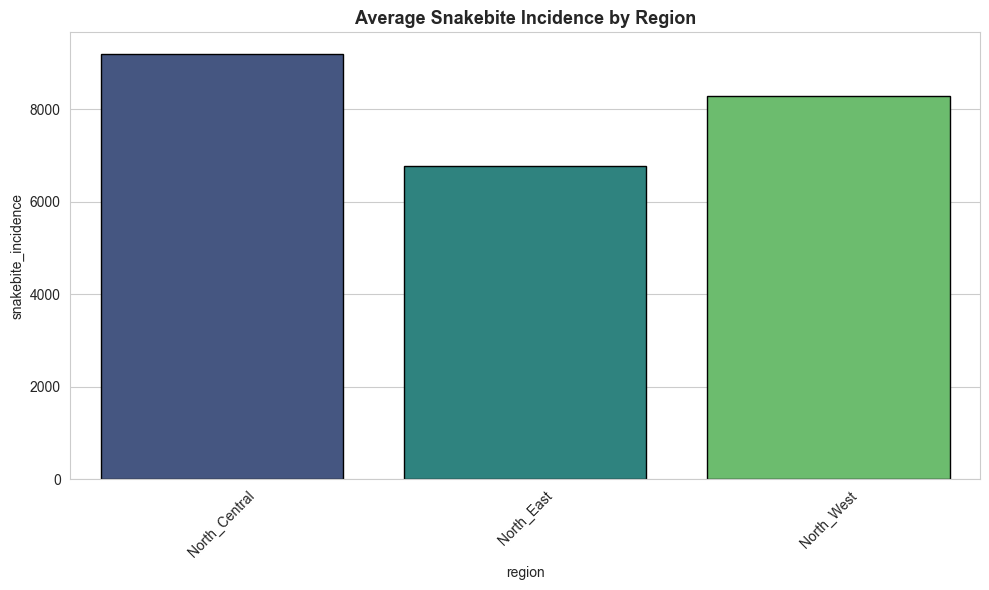

✓ Saved: regional_snakebite_incidence.png

[STEP 4] K-Means Clustering for Treatment Trends & Regional Disparities...
✓ K-Means clustering completed with K=4

Cluster Summary (Regional Disparities):
         snakebite_incidence treatment_source regional_health_accessibility  \
cluster                                                                       
0                   32366.15      Traditional                      Moderate   
1                    1547.69      Traditional                      Moderate   
2                    2111.31      Traditional                          Good   
3                    4123.51         Hospital                       Limited   

                region  
cluster                 
0        North_Central  
1           North_West  
2        North_Central  
3        North_Central  


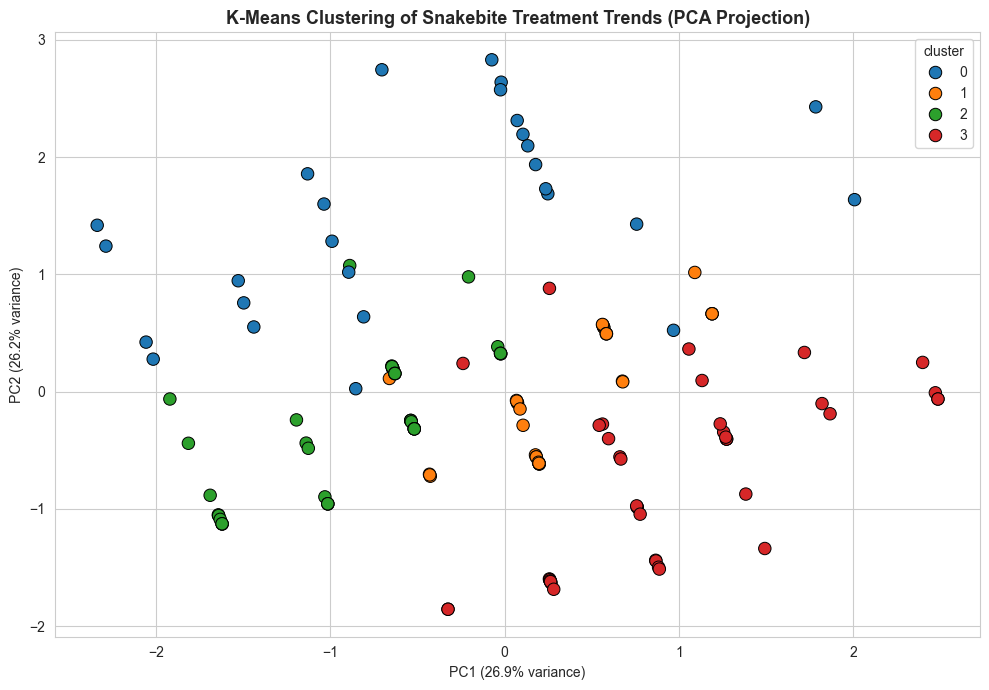

✓ Saved: kmeans_treatment_trends_pca.png


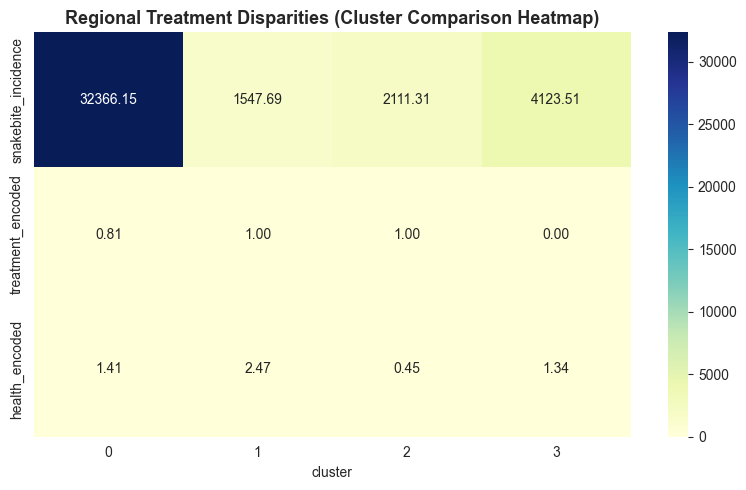

✓ Saved: regional_cluster_heatmap.png

✓ Final dataset saved: C:\Users\hp\Desktop\PDF-folder\snakebite_regional_clustered.csv
✓ Regional clustering summary saved: C:\Users\hp\Desktop\PDF-folder\regional_clustering_summary.txt

✓ PIPELINE COMPLETED SUCCESSFULLY

All outputs saved in: C:\Users\hp\Desktop\PDF-folder


In [1]:
# ========================================================================
# SNAKEBITE DATA PIPELINE: REGIONAL SEGMENTATION & CLUSTERING ANALYSIS
# ========================================================================

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("="*80)
print("SNAKEBITE DATA PIPELINE: REGIONAL SEGMENTATION & CLUSTERING ANALYSIS")
print("="*80)

# ========================================================================
# STEP 1: LOAD DATA
# ========================================================================
file_path = r"C:\Users\hp\Desktop\PDF-folder\COMBINED.csv"
output_dir = os.path.dirname(file_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("\n[STEP 1] Loading dataset...")
df = pd.read_csv(file_path)
print(f"✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Normalize columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(f"Columns: {df.columns.tolist()}")

# ========================================================================
# STEP 2: DATA CLEANING
# ========================================================================
print("\n[STEP 2] Data Cleaning...")

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna("Unknown", inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Save cleaned version
cleaned_path = os.path.join(output_dir, "snakebite_cleaned_for_segmentation.csv")
df.to_csv(cleaned_path, index=False, encoding="utf-8-sig")
print(f"✓ Cleaned dataset saved: {cleaned_path}")

# ========================================================================
# STEP 3: REGIONAL SEGMENTATION ANALYSIS
# ========================================================================
print("\n[STEP 3] Regional Segmentation Analysis...")

# Group by region and summarize
if "region" in df.columns:
    region_summary = df.groupby("region").agg({
        "snakebite_incidence": "mean",
        "treatment_source": lambda x: x.mode()[0] if len(x.mode()) > 0 else "Unknown",
        "regional_health_accessibility": lambda x: x.mode()[0] if len(x.mode()) > 0 else "Unknown"
    }).round(2)

    print("\nRegional Summary:")
    print(region_summary)

    # Barplot: Average Snakebite Incidence by Region
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region_summary.index, y="snakebite_incidence",
                data=region_summary.reset_index(), palette="viridis", edgecolor="black")
    plt.title("Average Snakebite Incidence by Region", fontsize=13, fontweight="bold")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "regional_snakebite_incidence.png"), dpi=300, bbox_inches="tight")
    plt.show()
    print("✓ Saved: regional_snakebite_incidence.png")

# ========================================================================
# STEP 4: CLUSTERING ANALYSIS (K-MEANS)
# ========================================================================
print("\n[STEP 4] K-Means Clustering for Treatment Trends & Regional Disparities...")

# Encode categorical columns
le = LabelEncoder()
if "treatment_source" in df.columns:
    df["treatment_encoded"] = le.fit_transform(df["treatment_source"].astype(str))
else:
    df["treatment_encoded"] = 0

if "regional_health_accessibility" in df.columns:
    df["health_encoded"] = le.fit_transform(df["regional_health_accessibility"].astype(str))
else:
    df["health_encoded"] = 0

if "region" in df.columns:
    df["region_encoded"] = le.fit_transform(df["region"].astype(str))
else:
    df["region_encoded"] = 0

# Select features for clustering
features = ["snakebite_incidence", "treatment_encoded", "health_encoded", "region_encoded"]
X = df[features].copy()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)
print(f"✓ K-Means clustering completed with K={optimal_k}")

# Cluster summary
cluster_summary = df.groupby("cluster").agg({
    "snakebite_incidence": "mean",
    "treatment_source": lambda x: x.mode()[0] if len(x.mode()) > 0 else "Unknown",
    "regional_health_accessibility": lambda x: x.mode()[0] if len(x.mode()) > 0 else "Unknown",
    "region": lambda x: x.mode()[0] if len(x.mode()) > 0 else "Unknown"
}).round(2)

print("\nCluster Summary (Regional Disparities):")
print(cluster_summary)

# Visualize clusters (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],
                hue=df["cluster"], palette="tab10", s=80, edgecolor="black")
plt.title("K-Means Clustering of Snakebite Treatment Trends (PCA Projection)",
          fontsize=13, fontweight="bold")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "kmeans_treatment_trends_pca.png"), dpi=300, bbox_inches="tight")
plt.show()
print("✓ Saved: kmeans_treatment_trends_pca.png")

# Cluster heatmap for disparities
plt.figure(figsize=(8, 5))
sns.heatmap(df.groupby("cluster")[["snakebite_incidence", "treatment_encoded", "health_encoded"]].mean().T,
            annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Regional Treatment Disparities (Cluster Comparison Heatmap)", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "regional_cluster_heatmap.png"), dpi=300, bbox_inches="tight")
plt.show()
print("✓ Saved: regional_cluster_heatmap.png")

# ========================================================================
# STEP 5: SAVE RESULTS
# ========================================================================
out_csv = os.path.join(output_dir, "snakebite_regional_clustered.csv")
df.to_csv(out_csv, index=False, encoding="utf-8-sig")
print(f"\n✓ Final dataset saved: {out_csv}")

summary_path = os.path.join(output_dir, "regional_clustering_summary.txt")
with open(summary_path, "w", encoding="utf-8") as f:
    f.write("REGIONAL SEGMENTATION & CLUSTERING ANALYSIS SUMMARY\n")
    f.write("="*80 + "\n\n")
    f.write("REGIONAL SUMMARY:\n")
    if "region" in df.columns:
        f.write(region_summary.to_string() + "\n\n")
    f.write("CLUSTER SUMMARY (REGIONAL DISPARITIES):\n")
    f.write(cluster_summary.to_string() + "\n\n")

print("✓ Regional clustering summary saved:", summary_path)
print("\n" + "="*80)
print("✓ PIPELINE COMPLETED SUCCESSFULLY")
print("="*80)
print(f"\nAll outputs saved in: {output_dir}")


**Distribution of real and simulated data records**

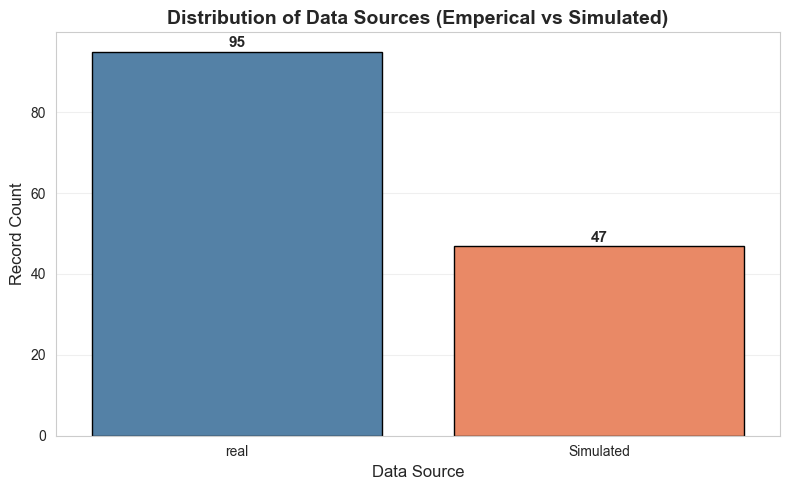

✓ Chart saved as: data_source_distribution.png


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Load your dataset
file_path = r"C:\Users\hp\Desktop\PDF-folder\COMBINED.csv"  
df = pd.read_csv(file_path)

# Check if the column exists
if 'data_source' not in df.columns:
    raise KeyError("⚠ 'data_source' column not found in the dataset.")

# Count the number of real vs simulated records
source_counts = df['data_source'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=source_counts.index, y=source_counts.values, palette=['steelblue', 'coral'], edgecolor='black')

# Annotate values
for i, val in enumerate(source_counts.values):
    plt.text(i, val + 1, f'{val}', ha='center', fontsize=11, fontweight='bold')

# Chart labels and styling
plt.title('Distribution of Data Sources (Emperical vs Simulated)', fontsize=14, fontweight='bold')
plt.xlabel('Data Source', fontsize=12)
plt.ylabel('Record Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Save chart
output_dir = os.path.dirname(file_path)
plt.savefig(os.path.join(output_dir, 'data_source_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved as: data_source_distribution.png")


**TASK 3: Exploratory Data Analysis (EDA)**

In [3]:
# =======================================================================
# EXPLORATORY DATA ANALYSIS (EDA)
# =======================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# File path
file_path = r"C:\Users\hp\Desktop\PDF-folder\COMBINED.csv"

# Load the dataset
df = pd.read_csv(file_path, encoding='utf-8-sig')

print("="*80)
print("EXPLORATORY DATA ANALYSIS (EDA): Snakebite & Medicinal Plant Dataset")
print("="*80)

# Basic info
print("\n[1] Dataset Overview:")
print(df.head())
print("\n[2] Summary Statistics:")
print(df.describe(include='all'))

# Set visualization theme
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# =======================================================================
#  Snakebite Frequency per State
# =======================================================================
if 'Region' in df.columns and 'Snakebite_incidence' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df,
        x='Region',
        y='Snakebite_incidence',
        estimator='mean',
        palette='Reds_r',
        edgecolor='black'
    )
    plt.title('Average Snakebite Frequency per Region', fontsize=14, fontweight='bold')
    plt.xlabel('Region')
    plt.ylabel('Average Snakebite Incidence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(os.path.dirname(file_path), 'eda_snakebite_frequency.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Chart saved: eda_snakebite_frequency.png")
else:
    print("⚠ Columns for snakebite frequency not found.")

# =======================================================================
#  Distribution of Plant Species Used per Region
# =======================================================================
if 'Medicinal_plants_with_antivenom_properties' in df.columns and 'Region' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df,
        x='Region',
        hue='Medicinal_plants_with_antivenom_properties',
        palette='Set2',
        edgecolor='black'
    )
    plt.title('Distribution of Medicinal Plants Used per Region', fontsize=14, fontweight='bold')
    plt.xlabel('Region')
    plt.ylabel('Count of Plant Usage')
    plt.xticks(rotation=45)
    plt.legend(title='Medicinal Plant')
    plt.tight_layout()
    plt.savefig(os.path.join(os.path.dirname(file_path), 'eda_plant_distribution_by_region.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Chart saved: eda_plant_distribution_by_region.png")
else:
    print("⚠ Columns for plant distribution not found.")

# =======================================================================
#  Correlation: Plant Usage vs Recovery Outcomes
# =======================================================================
if 'Plant_usage' in df.columns and 'Recovery_outcomes' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df,
        x='Plant_usage',
        y='Recovery_outcomes',
        palette='coolwarm',
        showfliers=False
    )
    plt.title('Correlation between Plant Usage and Recovery Outcomes', fontsize=14, fontweight='bold')
    plt.xlabel('Plant Usage Level')
    plt.ylabel('Recovery Outcome Score')
    plt.tight_layout()
    plt.savefig(os.path.join(os.path.dirname(file_path), 'eda_plant_usage_vs_recovery.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Chart saved: eda_plant_usage_vs_recovery.png")
else:
    print("⚠ Columns for correlation not found.")

print("\nEDA completed successfully! Charts saved in:")
print(os.path.dirname(file_path))


EXPLORATORY DATA ANALYSIS (EDA): Snakebite & Medicinal Plant Dataset

[1] Dataset Overview:
     state         plant_species  effectiveness_rate  snakebite_incidence  \
0     Kano     Crotalaria retusa                75.0                 1500   
1   Bauchi        Allium sativum                65.0                 1200   
2  Zamfara     Solanum melongena                60.0                 1400   
3   Kaduna             Aloe vera                80.0                 1300   
4    Niger  Bryophyllum pinnatum                70.0                 1100   

  demo_category age_group data_source  \
0         Rural    Adults   Simulated   
1         Rural    Adults   Simulated   
2         Rural  Children   Simulated   
3         Rural    Adults   Simulated   
4         Rural  Children   Simulated   

  medicinal_plants_with_antivenom_properties regional_health_accessibility  \
0                                        Yes                      Moderate   
1                                         

**visualizion insights** 

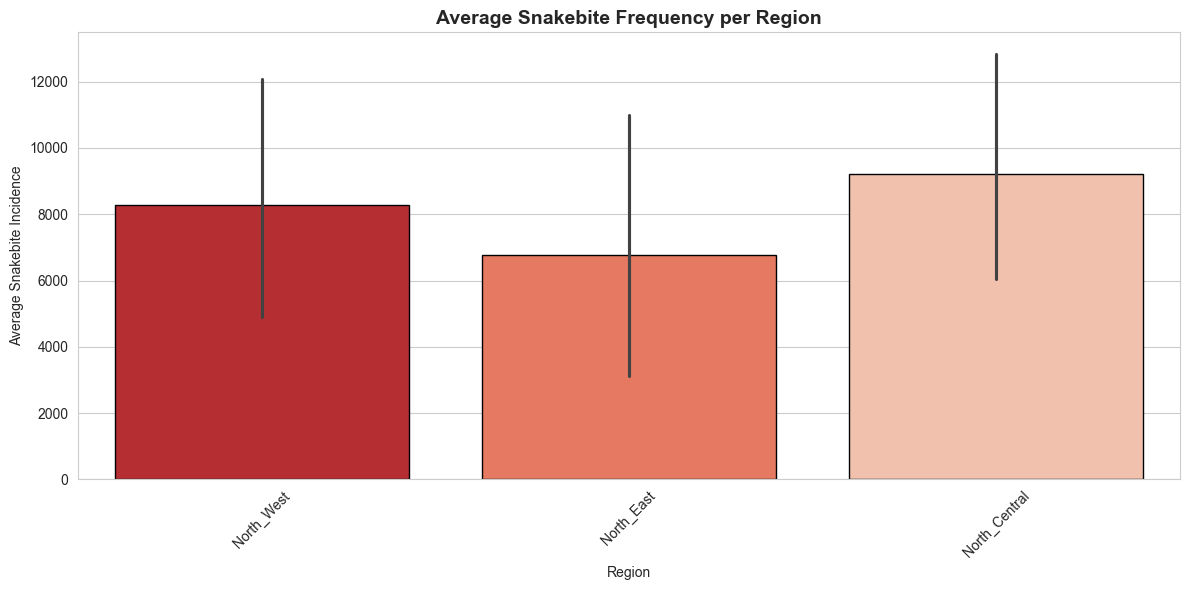

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Explicitly assign 'x' as 'hue' and disable the legend
sns.barplot(
    data=df,
    x='region',
    y='snakebite_incidence',
    hue='region',           # new addition
    palette='Reds_r',
    estimator='mean',
    legend=False,           # hides redundant legend
    edgecolor='black'
)

plt.title('Average Snakebite Frequency per Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Average Snakebite Incidence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Confusion matrix data simulation**

In [3]:
import pandas as pd
import os

# Create the dataset
data = {
    "Snake Species": [
        "Black Mamba", "Puff Adder", "Gaboon Viper", "Forest Cobra", 
        "Mossambique Spitting Cobra", "Boomslang", "West African Carpet Viper",
        "Egyptian Cobra", "Horned Viper", "Royal Cobra"
    ],
    "Scientific Name": [
        "Dendroaspis polylepis", "Bitis arietans", "Bitis gabonica", "Naja melanoleuca",
        "Naja mossambica", "Dispholidus typus", "Echis ocellatus",
        "Naja haje", "Bitis nasicornis", "Naja royal"
    ],
    "Habitat": [
        "Grasslands, savannas", "Deserts, savannas", "Forests, savannas",
        "Rainforests", "Savannas, forests", "Woodlands, forests",
        "Savannas, deserts", "Savannas, forests", "Forests, savannas", "Savannas, forests"
    ],
    "Venom Type": [
        "Neurotoxic", "Hemotoxic", "Hemotoxic, Neurotoxic", "Neurotoxic",
        "Neurotoxic (spitting)", "Hemotoxic", "Hemotoxic",
        "Neurotoxic", "Hemotoxic", "Neurotoxic"
    ]
}

# Create DataFrame
df_snakes = pd.DataFrame(data)

#  Save to desktop safely
desktop_path = os.path.expanduser("~/Desktop/nigerian_venomous_snakes.csv")
df_snakes.to_csv(desktop_path, index=False, encoding='utf-8-sig')

print(f" CSV file saved successfully at:\n{desktop_path}")


 CSV file saved successfully at:
C:\Users\hp/Desktop/nigerian_venomous_snakes.csv


**Confusion matrix table to categorize venomous snake species that are native to West Africa**

WEST AFRICAN VENOMOUS SNAKES - CONFUSION MATRIX TABLE

[STEP 1] Loading West African Venomous Snake Dataset...
✓ Output directory exists: C:\Users\hp\Desktop\WK4
✓ Dataset loaded successfully: 10 rows, 4 columns

Columns in dataset: ['Snake Species', 'Scientific Name', 'Habitat', 'Venom Type']

[1.1] First 10 rows of the dataset:
                Snake Species        Scientific Name               Habitat  \
0                 Black Mamba  Dendroaspis polylepis  Grasslands, savannas   
1                  Puff Adder         Bitis arietans     Deserts, savannas   
2                Gaboon Viper         Bitis gabonica     Forests, savannas   
3                Forest Cobra       Naja melanoleuca           Rainforests   
4  Mossambique Spitting Cobra        Naja mossambica     Savannas, forests   
5                   Boomslang      Dispholidus typus    Woodlands, forests   
6   West African Carpet Viper        Echis ocellatus     Savannas, deserts   
7              Egyptian Cobra              N

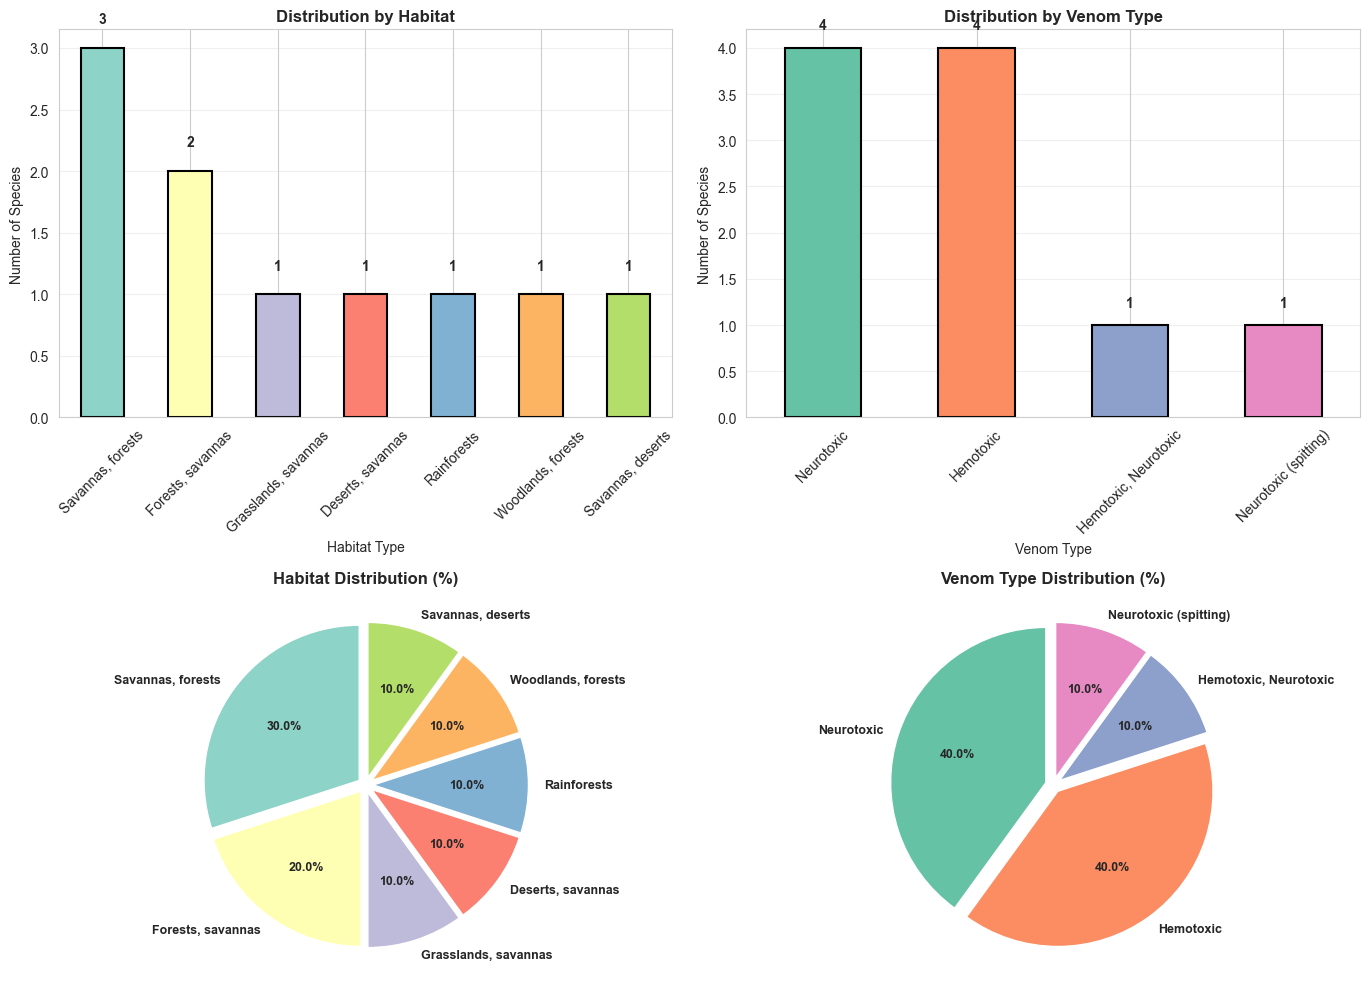


✓ Chart saved: snake_species_distribution.png

[STEP 3] Creating Confusion Matrix

[3.1] Habitat classes (7): ['Deserts, savannas' 'Forests, savannas' 'Grasslands, savannas'
 'Rainforests' 'Savannas, deserts' 'Savannas, forests'
 'Woodlands, forests']
[3.2] Venom type classes (4): ['Hemotoxic' 'Hemotoxic, Neurotoxic' 'Neurotoxic' 'Neurotoxic (spitting)']

[3.3] Creating confusion matrix...
  Rows (Habitat): 7 categories
  Columns (Venom Type): 4 categories

[3.4] Confusion Matrix (Habitat vs Venom Type):
Venom Type            Hemotoxic  Hemotoxic, Neurotoxic  Neurotoxic  \
Habitat                                                              
Deserts, savannas             1                      0           0   
Forests, savannas             1                      1           0   
Grasslands, savannas          0                      0           1   
Rainforests                   0                      0           1   
Savannas, deserts             1                      0           0   

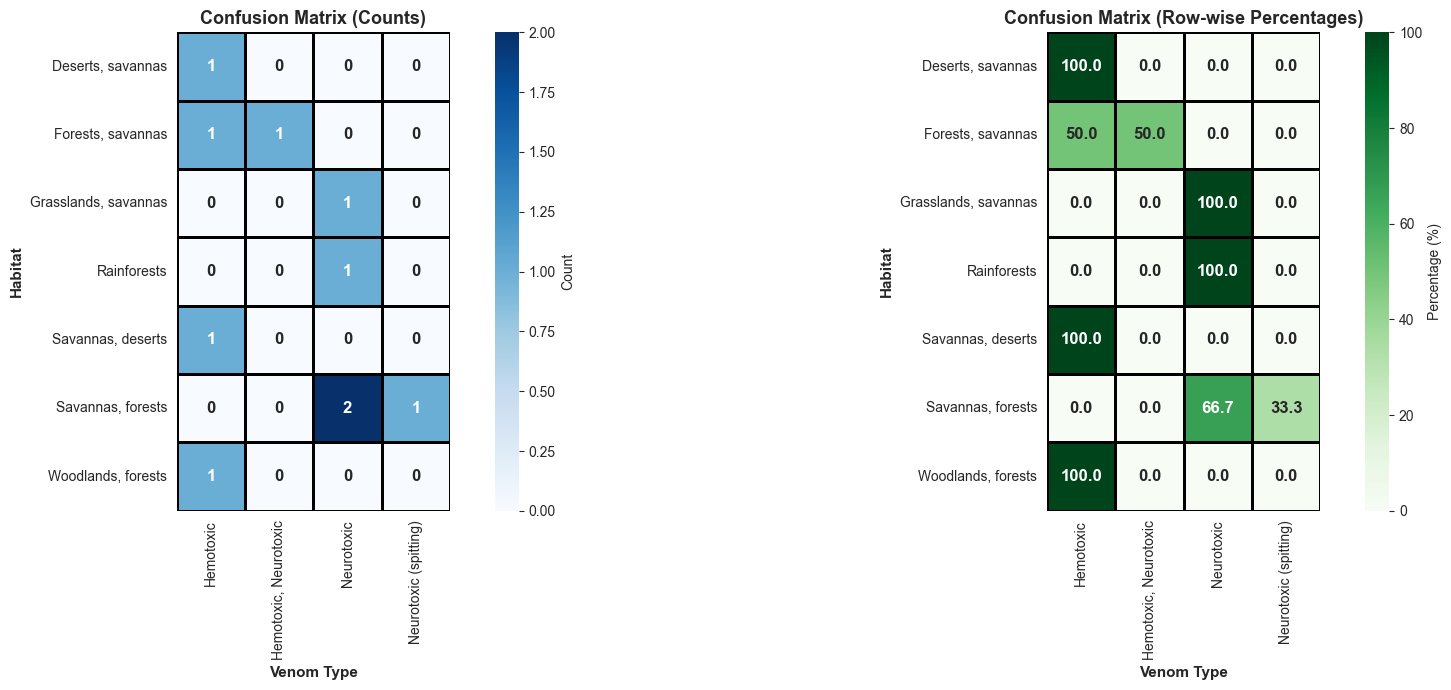

✓ Chart saved: confusion_matrix_combined.png

[STEP 6] Stacked Visualization


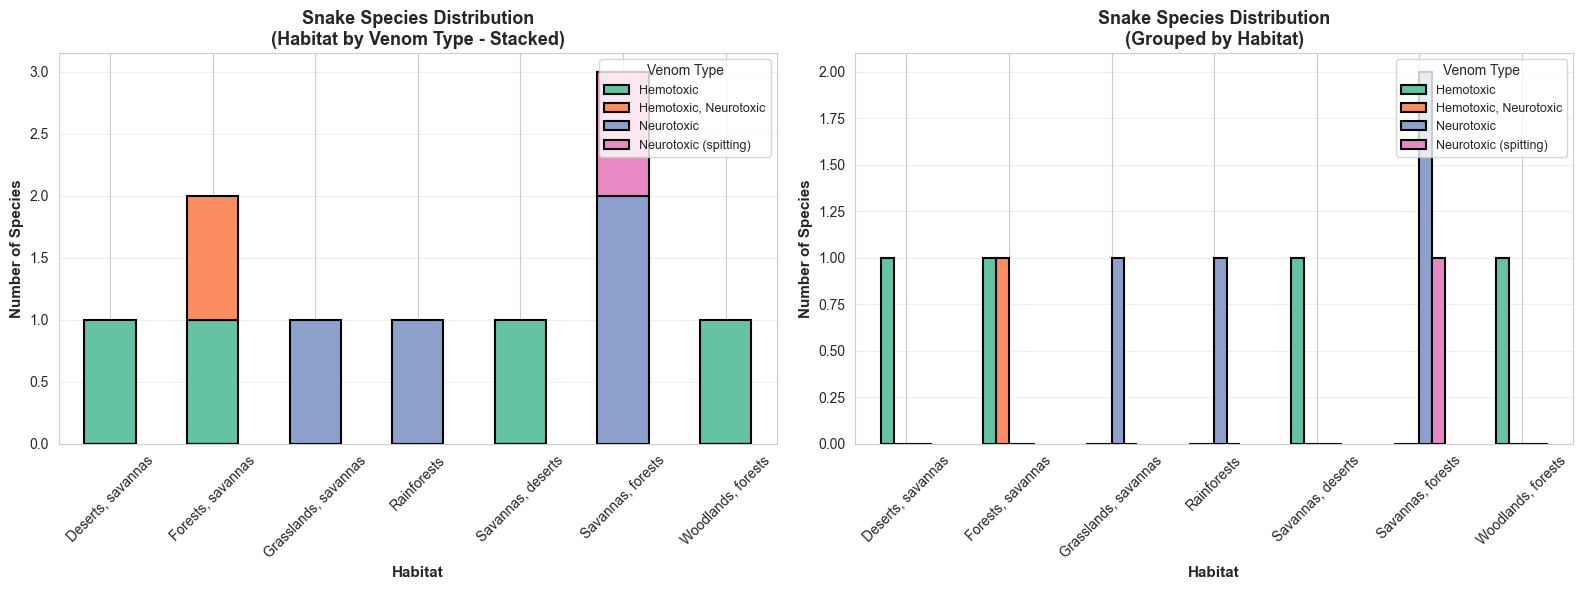

✓ Chart saved: habitat_venom_distribution.png

[STEP 7] Heatmap of Species Count


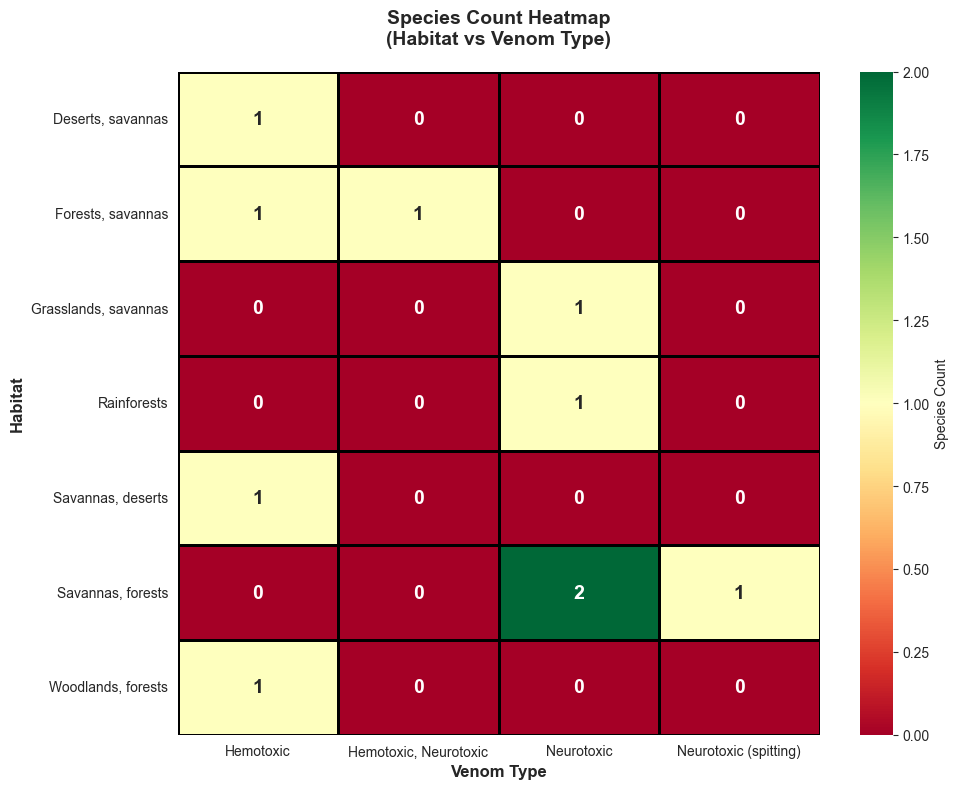

✓ Chart saved: species_count_heatmap.png

[STEP 8] Summary Statistics & Insights

[8.1] Key Statistics:
  Total venomous snake species: 10
  Number of habitats: 7
  Number of venom types: 4

[8.2] Most Common Combinations:
Habitat               Venom Type           
Savannas, forests     Neurotoxic               2
Deserts, savannas     Hemotoxic                1
Forests, savannas     Hemotoxic                1
Grasslands, savannas  Neurotoxic               1
Forests, savannas     Hemotoxic, Neurotoxic    1
Rainforests           Neurotoxic               1
Savannas, deserts     Hemotoxic                1
Savannas, forests     Neurotoxic (spitting)    1
Woodlands, forests    Hemotoxic                1
dtype: int64

[8.3] Habitat with Most Species:
  Savannas, forests: 3 species (30.0%)

[8.4] Most Common Venom Type:
  Neurotoxic: 4 species (40.0%)

[8.5] Confusion Matrix Summary:
  Total cells in matrix: 28
  Non-zero cells: 9
  Zero cells (empty combinations): 19

[STEP 9] Saving Compreh

In [9]:
# Nigerian Venomous Snake Species - Confusion Matrix Analysis
# Categorizing snake species by habitat and venom type from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("WEST AFRICAN VENOMOUS SNAKES - CONFUSION MATRIX TABLE")
print("="*80)

# ============================================================================
# STEP 1: LOAD DATA FROM CSV FILE
# ============================================================================
print("\n[STEP 1] Loading West African Venomous Snake Dataset...")

# File path
file_path = r"C:\Users\hp\Desktop\PDF-folder\SOURCED.csv"
output_path = r"C:\Users\hp\Desktop\WK4"

# Create output directory if it doesn't exist
import os
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print(f"✓ Created output directory: {output_path}")
else:
    print(f"✓ Output directory exists: {output_path}")

try:
    df_snakes = pd.read_csv(file_path)
    print(f"✓ Dataset loaded successfully: {df_snakes.shape[0]} rows, {df_snakes.shape[1]} columns")
except Exception as e:
    print(f"✗ Error loading file: {e}")
    raise

# Display column names
print(f"\nColumns in dataset: {df_snakes.columns.tolist()}")

# Display first few rows
print("\n[1.1] First 10 rows of the dataset:")
print(df_snakes.head(10))

# Check for missing values
print("\n[1.2] Missing values check:")
missing = df_snakes.isnull().sum()
for col, count in missing.items():
    if count > 0:
        print(f"  {col}: {count} missing values")
    else:
        print(f"  {col}: No missing values")

# Handle missing values if any
df_snakes = df_snakes.fillna('Unknown')

# Display complete dataset
print("\n[1.3] Complete West African Venomous Snake Species Dataset:")
print(df_snakes.to_string(index=False))

# Basic info
print(f"\n[1.4] Dataset Summary:")
print(f"  Total West African venomous snake species: {len(df_snakes)}")
print(f"  Unique habitats: {df_snakes['Habitat'].nunique()}")
print(f"  Unique venom types: {df_snakes['Venom Type'].nunique()}")

# ============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("[STEP 2] Exploratory Data Analysis")
print("="*80)

# Distribution by Habitat
print("\n[2.1] Distribution by Habitat:")
habitat_dist = df_snakes['Habitat'].value_counts()
print(habitat_dist)

# Distribution by Venom Type
print("\n[2.2] Distribution by Venom Type:")
venom_dist = df_snakes['Venom Type'].value_counts()
print(venom_dist)

# Cross-tabulation: Habitat vs Venom Type
print("\n[2.3] Cross-tabulation: Habitat vs Venom Type:")
crosstab = pd.crosstab(df_snakes['Habitat'], df_snakes['Venom Type'], margins=True)
print(crosstab)

# List all unique snake species
print("\n[2.4] All Snake Species in Dataset:")
for idx, row in df_snakes.iterrows():
    print(f"  {idx+1}. {row['Snake Species']} ({row['Scientific Name']})")

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Habitat distribution
habitat_colors = plt.cm.Set3(range(len(habitat_dist)))
habitat_dist.plot(kind='bar', ax=axes[0, 0], color=habitat_colors, edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Distribution by Habitat', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Habitat Type', fontsize=10)
axes[0, 0].set_ylabel('Number of Species', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(habitat_dist):
    axes[0, 0].text(i, v + 0.2, str(v), ha='center', fontweight='bold', fontsize=10)

# Venom type distribution
venom_colors = plt.cm.Set2(range(len(venom_dist)))
venom_dist.plot(kind='bar', ax=axes[0, 1], color=venom_colors, edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Distribution by Venom Type', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Venom Type', fontsize=10)
axes[0, 1].set_ylabel('Number of Species', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(venom_dist):
    axes[0, 1].text(i, v + 0.2, str(v), ha='center', fontweight='bold', fontsize=10)

# Pie chart - Habitat
axes[1, 0].pie(habitat_dist, labels=habitat_dist.index, autopct='%1.1f%%', 
               colors=habitat_colors, startangle=90, 
               explode=[0.05]*len(habitat_dist), textprops={'fontsize': 9, 'weight': 'bold'})
axes[1, 0].set_title('Habitat Distribution (%)', fontsize=12, fontweight='bold')

# Pie chart - Venom Type
axes[1, 1].pie(venom_dist, labels=venom_dist.index, autopct='%1.1f%%',
               colors=venom_colors, startangle=90,
               explode=[0.05]*len(venom_dist), textprops={'fontsize': 9, 'weight': 'bold'})
axes[1, 1].set_title('Venom Type Distribution (%)', fontsize=12, fontweight='bold')

plt.tight_layout()
output_file = os.path.join(output_path, 'snake_species_distribution.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Chart saved: snake_species_distribution.png")

# ============================================================================
# STEP 3: CREATE CONFUSION MATRIX
# ============================================================================
print("\n" + "="*80)
print("[STEP 3] Creating Confusion Matrix")
print("="*80)

# Encode categorical variables
le_habitat = LabelEncoder()
le_venom = LabelEncoder()

df_snakes['Habitat_encoded'] = le_habitat.fit_transform(df_snakes['Habitat'])
df_snakes['Venom_encoded'] = le_venom.fit_transform(df_snakes['Venom Type'])

print(f"\n[3.1] Habitat classes ({len(le_habitat.classes_)}): {le_habitat.classes_}")
print(f"[3.2] Venom type classes ({len(le_venom.classes_)}): {le_venom.classes_}")

# Get the unique labels for both dimensions
habitat_labels = sorted(df_snakes['Habitat'].unique())
venom_labels = sorted(df_snakes['Venom Type'].unique())

print(f"\n[3.3] Creating confusion matrix...")
print(f"  Rows (Habitat): {len(habitat_labels)} categories")
print(f"  Columns (Venom Type): {len(venom_labels)} categories")

# Use crosstab to create the confusion matrix (appropriate for cross-tabulating two categorical variables)
cm_df = pd.crosstab(
    df_snakes['Habitat'], 
    df_snakes['Venom Type'],
    rownames=['Habitat'],
    colnames=['Venom Type']
)

# Convert to numpy array for calculations in later steps
cm = cm_df.values

print("\n[3.4] Confusion Matrix (Habitat vs Venom Type):")
print(cm_df)

# ============================================================================
# STEP 4: CATEGORIZATION MATRIX (HABITAT × VENOM TYPE)
# ============================================================================
print("\n" + "="*80)
print("[STEP 4] Detailed Categorization Matrix with Snake Species")
print("="*80)

# Create detailed categorization showing which snakes belong to each category
print("\n[4.1] Snake Species by Habitat and Venom Type:")

categorization = {}
for habitat in sorted(df_snakes['Habitat'].unique()):
    categorization[habitat] = {}
    for venom in sorted(df_snakes['Venom Type'].unique()):
        species = df_snakes[
            (df_snakes['Habitat'] == habitat) & 
            (df_snakes['Venom Type'] == venom)
        ][['Snake Species', 'Scientific Name']].values.tolist()
        if species:
            categorization[habitat][venom] = species
            print(f"\n{habitat} + {venom}: ({len(species)} species)")
            for snake in species:
                print(f"  - {snake[0]} ({snake[1]})")

# Create a detailed categorization table
print("\n[4.2] Creating Detailed Categorization Table...")

category_data = []
for _, row in df_snakes.iterrows():
    category_data.append({
        'Category': f"{row['Habitat']}_{row['Venom Type']}",
        'Snake Species': row['Snake Species'],
        'Scientific Name': row['Scientific Name'],
        'Habitat': row['Habitat'],
        'Venom Type': row['Venom Type']
    })

df_categorized = pd.DataFrame(category_data)
df_categorized = df_categorized.sort_values(['Habitat', 'Venom Type', 'Snake Species'])

print("\nCategorized Snake Species Table:")
print(df_categorized.to_string(index=False))

# Save categorized table
output_file = os.path.join(output_path, 'snakes_categorized_by_habitat_venom.csv')
df_categorized.to_csv(output_file, index=False)
print("\n✓ Categorized table saved: snakes_categorized_by_habitat_venom.csv")

# ============================================================================
# STEP 5: ADVANCED CONFUSION MATRIX VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("[STEP 5] Advanced Confusion Matrix with Percentages")
print("="*80)

# Calculate percentages (row-wise normalization)
cm_percent_df = cm_df.div(cm_df.sum(axis=1), axis=0) * 100

# Create combined display (count + percentage)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Left: Raw counts
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            linewidths=2, linecolor='black', cbar_kws={'label': 'Count'},
            square=True, annot_kws={'size': 12, 'weight': 'bold'})
axes[0].set_title('Confusion Matrix (Counts)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Venom Type', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Habitat', fontsize=11, fontweight='bold')

# Right: Percentages
sns.heatmap(cm_percent_df, annot=True, fmt='.1f', cmap='Greens', ax=axes[1],
            linewidths=2, linecolor='black', cbar_kws={'label': 'Percentage (%)'},
            square=True, annot_kws={'size': 12, 'weight': 'bold'})
axes[1].set_title('Confusion Matrix (Row-wise Percentages)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Venom Type', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Habitat', fontsize=11, fontweight='bold')

plt.tight_layout()
output_file = os.path.join(output_path, 'confusion_matrix_combined.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved: confusion_matrix_combined.png")

# ============================================================================
# STEP 6: STACKED BAR CHART - HABITAT BY VENOM TYPE
# ============================================================================
print("\n" + "="*80)
print("[STEP 6] Stacked Visualization")
print("="*80)

# Create stacked bar chart
habitat_venom_counts = pd.crosstab(df_snakes['Habitat'], df_snakes['Venom Type'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
habitat_venom_counts.plot(kind='bar', stacked=True, ax=axes[0], 
                          color=plt.cm.Set2(range(len(habitat_venom_counts.columns))),
                          edgecolor='black', linewidth=1.5)
axes[0].set_title('Snake Species Distribution\n(Habitat by Venom Type - Stacked)', 
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Habitat', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Number of Species', fontsize=11, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Venom Type', loc='upper right', fontsize=9)
axes[0].grid(axis='y', alpha=0.3)

# Grouped bar chart
habitat_venom_counts.plot(kind='bar', ax=axes[1],
                          color=plt.cm.Set2(range(len(habitat_venom_counts.columns))),
                          edgecolor='black', linewidth=1.5)
axes[1].set_title('Snake Species Distribution\n(Grouped by Habitat)', 
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Habitat', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Number of Species', fontsize=11, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Venom Type', loc='upper right', fontsize=9)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
output_file = os.path.join(output_path, 'habitat_venom_distribution.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved: habitat_venom_distribution.png")

# ============================================================================
# STEP 7: HEATMAP OF SPECIES COUNT BY CATEGORY
# ============================================================================
print("\n" + "="*80)
print("[STEP 7] Heatmap of Species Count")
print("="*80)

plt.figure(figsize=(10, 8))
sns.heatmap(habitat_venom_counts, annot=True, fmt='d', cmap='RdYlGn',
            linewidths=2, linecolor='black', cbar_kws={'label': 'Species Count'},
            square=False, annot_kws={'size': 14, 'weight': 'bold'})
plt.title('Species Count Heatmap\n(Habitat vs Venom Type)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Venom Type', fontsize=12, fontweight='bold')
plt.ylabel('Habitat', fontsize=12, fontweight='bold')
plt.tight_layout()
output_file = os.path.join(output_path, 'species_count_heatmap.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved: species_count_heatmap.png")

# ============================================================================
# STEP 8: SUMMARY STATISTICS & INSIGHTS
# ============================================================================
print("\n" + "="*80)
print("[STEP 8] Summary Statistics & Insights")
print("="*80)

print("\n[8.1] Key Statistics:")
print(f"  Total venomous snake species: {len(df_snakes)}")
print(f"  Number of habitats: {df_snakes['Habitat'].nunique()}")
print(f"  Number of venom types: {df_snakes['Venom Type'].nunique()}")

print("\n[8.2] Most Common Combinations:")
combination_counts = df_snakes.groupby(['Habitat', 'Venom Type']).size().sort_values(ascending=False)
print(combination_counts)

print("\n[8.3] Habitat with Most Species:")
print(f"  {habitat_dist.idxmax()}: {habitat_dist.max()} species ({habitat_dist.max()/len(df_snakes)*100:.1f}%)")

print("\n[8.4] Most Common Venom Type:")
print(f"  {venom_dist.idxmax()}: {venom_dist.max()} species ({venom_dist.max()/len(df_snakes)*100:.1f}%)")

print("\n[8.5] Confusion Matrix Summary:")
print(f"  Total cells in matrix: {cm.size}")
print(f"  Non-zero cells: {np.count_nonzero(cm)}")
print(f"  Zero cells (empty combinations): {cm.size - np.count_nonzero(cm)}")

# ============================================================================
# STEP 9: SAVE COMPREHENSIVE SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("[STEP 9] Saving Comprehensive Summary Report")
print("="*80)

# Save summary report
output_file = os.path.join(output_path, 'snake_confusion_matrix_summary.txt')
with open(output_file, 'w', encoding='utf-8') as f:
    f.write("WEST AFRICAN VENOMOUS SNAKES - CONFUSION MATRIX TABLE\n")
    f.write("="*80 + "\n\n")
    
    f.write("DATASET SUMMARY\n")
    f.write(f"Total West African Venomous Snake Species: {len(df_snakes)}\n")
    f.write(f"Habitats ({df_snakes['Habitat'].nunique()}): {', '.join(sorted(df_snakes['Habitat'].unique()))}\n")
    f.write(f"Venom Types ({df_snakes['Venom Type'].nunique()}): {', '.join(sorted(df_snakes['Venom Type'].unique()))}\n\n")
    
    f.write("ALL WEST AFRICAN VENOMOUS SNAKE SPECIES IN DATASET\n")
    f.write("-" * 80 + "\n")
    for idx, row in df_snakes.iterrows():
        f.write(f"{idx+1}. {row['Snake Species']} ({row['Scientific Name']})\n")
        f.write(f"   Habitat: {row['Habitat']} | Venom Type: {row['Venom Type']}\n\n")
    
    f.write("\nCONFUSION MATRIX (Habitat vs Venom Type)\n")
    f.write("-" * 80 + "\n")
    f.write(cm_df.to_string() + "\n\n")
    
    f.write("CROSS-TABULATION WITH TOTALS\n")
    f.write("-" * 80 + "\n")
    f.write(crosstab.to_string() + "\n\n")
    
    f.write("DISTRIBUTION BY HABITAT\n")
    f.write("-" * 80 + "\n")
    f.write(habitat_dist.to_string() + "\n\n")
    
    f.write("DISTRIBUTION BY VENOM TYPE\n")
    f.write("-" * 80 + "\n")
    f.write(venom_dist.to_string() + "\n\n")
    
    f.write("MOST COMMON HABITAT-VENOM COMBINATIONS\n")
    f.write("-" * 80 + "\n")
    f.write(combination_counts.to_string() + "\n\n")
    
    f.write("DETAILED CATEGORIZATION BY HABITAT AND VENOM TYPE\n")
    f.write("="*80 + "\n\n")
    
    for habitat in sorted(df_snakes['Habitat'].unique()):
        for venom in sorted(df_snakes['Venom Type'].unique()):
            species = df_snakes[
                (df_snakes['Habitat'] == habitat) & 
                (df_snakes['Venom Type'] == venom)
            ][['Snake Species', 'Scientific Name']].values.tolist()
            if species:
                f.write(f"\n{habitat} + {venom}: ({len(species)} species)\n")
                f.write("-" * 80 + "\n")
                for snake in species:
                    f.write(f"  • {snake[0]} ({snake[1]})\n")

print("✓ Summary report saved: snake_confusion_matrix_summary.txt")

# ============================================================================
# FINAL OUTPUT SUMMARY
# ============================================================================
print("\n" + "="*80)
print("✓ WEST AFRICAN VENOMOUS SNAKES CONFUSION MATRIX TABLE COMPLETED!")
print("="*80)
print(f"\nAll outputs saved in: {output_path}")
print("\n Generated Files:")
print("  1. snakes_categorized_by_habitat_venom.csv - Categorized data table")
print("  2. snake_confusion_matrix_summary.txt - Comprehensive text report")
print("  3. snake_species_distribution.png - Distribution charts (4 subplots)")
print("  4. confusion_matrix_habitat_venom.png - Main confusion matrix heatmap")
print("  5. confusion_matrix_combined.png - Counts + Percentages side-by-side")
print("  6. habitat_venom_distribution.png - Stacked & grouped bar charts")
print("  7. species_count_heatmap.png - Species count heatmap")

print("\n Confusion Matrix Table Summary:")
print(f"  • Total West African venomous snake species: {len(df_snakes)}")
print(f"  • Matrix dimensions: {cm_df.shape[0]} habitats × {cm_df.shape[1]} venom types")
print(f"  • Total combinations: {cm_df.size}")
print(f"  • Active combinations (with species): {(cm_df > 0).sum().sum()}")
print(f"  • Empty combinations: {(cm_df == 0).sum().sum()}")

print("\n✓ Confusion matrix table for West African venomous snakes created successfully!")
print("✓ Check the output folder for the categorization table and visualizations.")

**TASK 5: Predictive Insights**

**A simple predictive model using Scikit-learn to estimate the potential effectiveness of traditional plant-based treatments based on plant_species, treatment_source, and region. TARGET VARIABLE: "Effective_rate", PREDICTORS: "plant_species,treatment_source, region"**

*#Checking for the best model to use in this case, first, i will want to confirm the distribution of the data
#checking for linearity of non-linearity of these variables. This will guide in the choice of the Model to adopt*
*# Since all predictors are categorical, a simple Linear Regression may not capture the complex interactions or non-linear patterns between the features and the target.

In [8]:
# ===============================================================
# CHECKING LINEARITY VS NON-LINEARITY OF THE EFFECTIVENESS MODEL
# ===============================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


X = df[['plant_species', 'treatment_source', 'recovery_outcomes', 'plant_usage', 'state']]   
y = df['effectiveness_rate']                              

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical variables using OneHotEncoder
categorical_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)]
)

# -----------------------------------
# Linear Regression Model
# -----------------------------------
linear_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(" LINEAR REGRESSION RESULTS:")
print(f"R² Score: {r2_linear:.4f}")
print(f"Mean Squared Error: {mse_linear:.4f}")
print("-" * 60)

# -----------------------------------
# : Random Forest Model
# -----------------------------------
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(" RANDOM FOREST REGRESSION RESULTS:")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")
print("-" * 60)

# -----------------------------------
#  Compare and Conclude
# -----------------------------------
if r2_rf > r2_linear + 0.1:
    print(" Data shows strong NON-LINEAR relationships — Random Forest fits better.")
elif abs(r2_rf - r2_linear) < 0.1:
    print(" Data appears mostly LINEAR — Linear Regression performs similarly.")
else:
    print(" Mixed results — consider testing polynomial or boosted models.")


 LINEAR REGRESSION RESULTS:
R² Score: -0.6795
Mean Squared Error: 414.5444
------------------------------------------------------------
 RANDOM FOREST REGRESSION RESULTS:
R² Score: 0.0626
Mean Squared Error: 231.3779
------------------------------------------------------------
 Data shows strong NON-LINEAR relationships — Random Forest fits better.


**Random Forest Regressor is adopted: Handles categorical features (via encoding), captures complex, non-linear relationships
Resistant to overfitting.
Best all-rounder for tabular data**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define X and y
X = df[['plant_species', 'treatment_source', 'recovery_outcomes', 'plant_usage', 'state']]
y = df['effectiveness_rate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical features
categorical_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)]
)

# Build the pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42
    ))
])

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", round(r2, 4))
print("Mean Squared Error:", round(mse, 4))


R² Score: 0.0913
Mean Squared Error: 224.2834


RANDOM FOREST MODEL: PLANT-BASED TREATMENT EFFECTIVENESS PREDICTION
Target: Effectiveness Rate (Percentage: 0-100%)

[STEP 1] Loading Plant-Based Treatment Dataset...
✓ Dataset loaded successfully: 142 rows, 13 columns

[1.1] Available Columns:
['state', 'plant_species', 'effectiveness_rate', 'snakebite_incidence', 'demo_category', 'age_group', 'data_source', 'medicinal_plants_with_antivenom_properties', 'regional_health_accessibility', 'plant_usage', 'recovery_outcomes', 'treatment_source', 'region']

[1.2] First 10 rows:
     state         plant_species  effectiveness_rate  snakebite_incidence  \
0     Kano     Crotalaria retusa                75.0                 1500   
1   Bauchi        Allium sativum                65.0                 1200   
2  Zamfara     Solanum melongena                60.0                 1400   
3   Kaduna             Aloe vera                80.0                 1300   
4    Niger  Bryophyllum pinnatum                70.0                 1100   
5  Adamaw

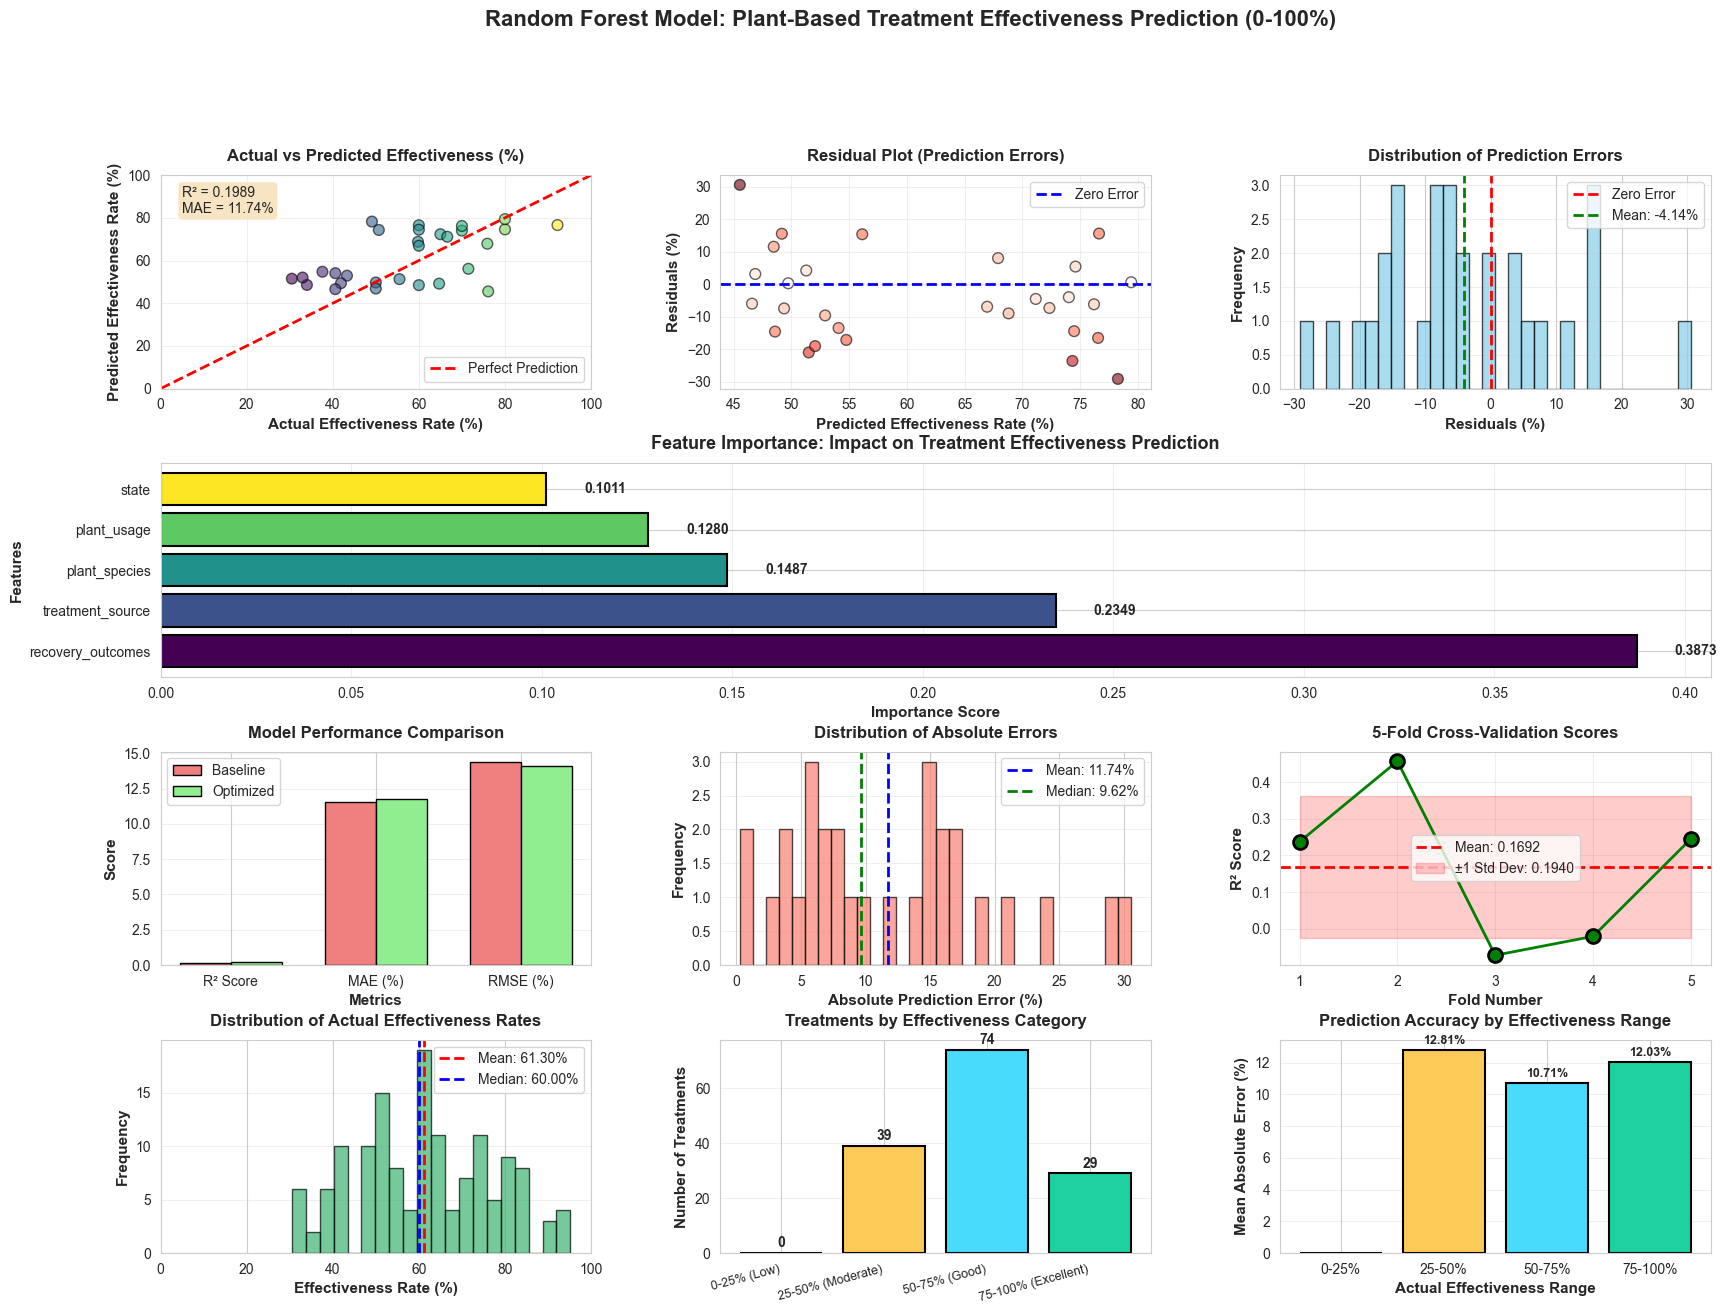

✓ Visualization saved: random_forest_analysis.png

[STEP 11] Saving Results
✓ Predictions saved: rf_predictions.csv
✓ Feature importance saved: feature_importance.csv
✓ Model summary saved: model_summary.txt
✓ Encoding mappings saved: encoding_mappings.txt

[STEP 12] Example Predictions

[12.1] Sample Predictions from Test Set:
--------------------------------------------------------------------------------
Actual (%) Predicted (%) Error (%)
     50.00         49.73      0.27
     40.60         54.09     13.49
     70.00         76.19      6.19
     37.60         54.76     17.16
     92.20         76.62     15.58
     60.00         48.48     11.52
     30.50         51.51     21.01
     49.10         78.26     29.16
     80.00         74.59      5.41
     40.60         46.60      6.00

[12.2] Prediction Accuracy Summary:
--------------------------------------------------------------------------------
Predictions within ±5%: 6 (20.7%)
Predictions within ±10%: 15 (51.7%)
Predictions with

In [10]:
# Random Forest Regressor Model for Plant-Based Treatment Effectiveness
# Predicting effectiveness_rate (percentage: 0-100%) using categorical predictors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("RANDOM FOREST MODEL: PLANT-BASED TREATMENT EFFECTIVENESS PREDICTION")
print("Target: Effectiveness Rate (Percentage: 0-100%)")
print("="*80)

# ============================================================================
# STEP 1: LOAD DATA
# ============================================================================
print("\n[STEP 1] Loading Plant-Based Treatment Dataset...")

file_path = r"C:\Users\hp\Desktop\PDF-folder\COMBINED.csv"
output_path = r"C:\Users\hp\Desktop\PDF-folder\model_outputs"

# Create output directory
import os
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print(f"✓ Created output directory: {output_path}")

# Load data
try:
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
except Exception as e:
    print(f"✗ Error loading file: {e}")
    raise

# Display basic info
print(f"\n[1.1] Available Columns:")
print(df.columns.tolist())

print(f"\n[1.2] First 10 rows:")
print(df.head(10))

print(f"\n[1.3] Dataset Info:")
print(df.info())

# ============================================================================
# STEP 2: DATA PREPARATION
# ============================================================================
print("\n" + "="*80)
print("[STEP 2] Data Preparation")
print("="*80)

# Define predictor variables and target
required_columns = ['plant_species', 'treatment_source', 'recovery_outcomes', 
                   'plant_usage', 'state', 'effectiveness_rate']

# Check if all required columns exist
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print(f"\n⚠ ERROR: Missing required columns: {missing_cols}")
    print(f"Available columns: {df.columns.tolist()}")
    raise ValueError(f"Missing columns: {missing_cols}")
else:
    print(f"✓ All required columns present")

# Select relevant columns
df_model = df[required_columns].copy()

print(f"\n[2.1] Dataset shape before cleaning: {df_model.shape}")

# Handle missing values
print(f"\n[2.2] Missing values check:")
missing = df_model.isnull().sum()
for col in df_model.columns:
    if missing[col] > 0:
        print(f"  {col}: {missing[col]} missing values ({missing[col]/len(df_model)*100:.2f}%)")

# Remove rows with missing values
df_model = df_model.dropna()
print(f"\n[2.3] Dataset shape after removing missing values: {df_model.shape}")

# Validate effectiveness_rate is in percentage format (0-100)
print(f"\n[2.4] Target Variable Validation (effectiveness_rate):")
print(f"  Data type: {df_model['effectiveness_rate'].dtype}")
print(f"  Range: [{df_model['effectiveness_rate'].min():.2f}%, {df_model['effectiveness_rate'].max():.2f}%]")
print(f"  Mean: {df_model['effectiveness_rate'].mean():.2f}%")
print(f"  Median: {df_model['effectiveness_rate'].median():.2f}%")
print(f"  Standard Deviation: {df_model['effectiveness_rate'].std():.2f}%")

# Check if values are within expected range
if df_model['effectiveness_rate'].min() < 0 or df_model['effectiveness_rate'].max() > 100:
    print(f"  ⚠ WARNING: Some values are outside 0-100% range!")
else:
    print(f"  ✓ All effectiveness rates are within valid range (0-100%)")

# Display categorical variable information
print(f"\n[2.5] Categorical Variables Summary:")
categorical_cols = ['plant_species', 'treatment_source', 'recovery_outcomes', 'plant_usage', 'state']

for col in categorical_cols:
    unique_count = df_model[col].nunique()
    print(f"\n  {col}:")
    print(f"    - Unique values: {unique_count}")
    print(f"    - Categories: {df_model[col].unique()[:10]}")  # Show first 10
    if unique_count <= 20:
        print(f"    - Distribution:")
        print(df_model[col].value_counts().head(10))

# Display target variable statistics
print(f"\n[2.6] Target Variable (effectiveness_rate) Detailed Statistics:")
print(df_model['effectiveness_rate'].describe())

# Distribution by effectiveness ranges
print(f"\n[2.7] Effectiveness Rate Distribution by Ranges:")
bins = [0, 25, 50, 75, 100]
labels = ['0-25% (Low)', '25-50% (Moderate)', '50-75% (Good)', '75-100% (Excellent)']
df_model['effectiveness_category'] = pd.cut(df_model['effectiveness_rate'], bins=bins, labels=labels, include_lowest=True)
print(df_model['effectiveness_category'].value_counts().sort_index())

# ============================================================================
# STEP 3: ENCODE CATEGORICAL VARIABLES
# ============================================================================
print("\n" + "="*80)
print("[STEP 3] Encoding Categorical Variables")
print("="*80)

# Create a copy for encoding
df_encoded = df_model.copy()

# Initialize label encoders
label_encoders = {}

print(f"\n[3.1] Encoding categorical variables...")
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"  ✓ {col}: {len(le.classes_)} classes encoded")
    
    # Show encoding mapping (first 10 if many)
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"    Encoding mapping (sample): {dict(list(mapping.items())[:10])}")

# Prepare features (X) and target (y)
feature_cols = [f'{col}_encoded' for col in categorical_cols]
X = df_encoded[feature_cols]
y = df_encoded['effectiveness_rate']

print(f"\n[3.2] Feature Matrix (X):")
print(f"  Shape: {X.shape}")
print(f"  Columns: {X.columns.tolist()}")

print(f"\n[3.3] Target Variable (y) - Effectiveness Rate:")
print(f"  Shape: {y.shape}")
print(f"  Range: [{y.min():.2f}%, {y.max():.2f}%]")
print(f"  Mean: {y.mean():.2f}%")
print(f"  Std: {y.std():.2f}%")
print(f"  Note: 100% = Highest Effectiveness, 0% = Lowest Effectiveness")

# ============================================================================
# STEP 4: SPLIT DATA
# ============================================================================
print("\n" + "="*80)
print("[STEP 4] Splitting Data into Training and Test Sets")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n[4.1] Data Split Summary:")
print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\n  Training effectiveness rate range: [{y_train.min():.2f}%, {y_train.max():.2f}%]")
print(f"  Test effectiveness rate range: [{y_test.min():.2f}%, {y_test.max():.2f}%]")

# ============================================================================
# STEP 5: TRAIN RANDOM FOREST MODEL
# ============================================================================
print("\n" + "="*80)
print("[STEP 5] Training Random Forest Regressor Model")
print("="*80)

print(f"\n[5.1] Training baseline Random Forest model...")

# Initialize and train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)
print("✓ Model trained successfully!")

# ============================================================================
# STEP 6: MAKE PREDICTIONS
# ============================================================================
print("\n" + "="*80)
print("[STEP 6] Making Predictions")
print("="*80)

# Predictions on training set
y_train_pred = rf_model.predict(X_train)
print(f"\n[6.1] Training set predictions (effectiveness %):")
print(f"  Sample predictions: {[f'{p:.2f}%' for p in y_train_pred[:5]]}")

# Predictions on test set
y_test_pred = rf_model.predict(X_test)
print(f"\n[6.2] Test set predictions (effectiveness %):")
print(f"  Sample predictions: {[f'{p:.2f}%' for p in y_test_pred[:5]]}")

# Ensure predictions are within 0-100% range
y_test_pred_clipped = np.clip(y_test_pred, 0, 100)
if not np.array_equal(y_test_pred, y_test_pred_clipped):
    print(f"  ⚠ Some predictions were outside 0-100% range and have been clipped")
    y_test_pred = y_test_pred_clipped

# ============================================================================
# STEP 7: EVALUATE MODEL PERFORMANCE
# ============================================================================
print("\n" + "="*80)
print("[STEP 7] Model Performance Evaluation")
print("="*80)

# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"\n[7.1] Training Set Performance:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  Mean Absolute Error (MAE): {train_mae:.4f}% (average error in prediction)")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:.4f}%")
print(f"  Mean Squared Error (MSE): {train_mse:.4f}")

# Test set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n[7.2] Test Set Performance:")
print(f"  R² Score: {test_r2:.4f} (model explains {test_r2*100:.2f}% of variance)")
print(f"  Mean Absolute Error (MAE): {test_mae:.4f}% (average error in percentage points)")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:.4f}%")
print(f"  Mean Squared Error (MSE): {test_mse:.4f}")

# Interpretation helper
print(f"\n[7.3] Performance Interpretation:")
print(f"  On average, predictions are off by ±{test_mae:.2f} percentage points")
print(f"  Example: If actual effectiveness is 75%, model predicts {75-test_mae:.2f}% to {75+test_mae:.2f}%")

# Check for overfitting
print(f"\n[7.4] Overfitting Check:")
print(f"  Training R²: {train_r2:.4f}")
print(f"  Test R²: {test_r2:.4f}")
print(f"  Difference: {abs(train_r2 - test_r2):.4f}")
if abs(train_r2 - test_r2) > 0.1:
    print("  ⚠ Warning: Possible overfitting detected!")
else:
    print("  ✓ Model generalization looks good!")

# Cross-validation
print(f"\n[7.5] 5-Fold Cross-Validation:")
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2', n_jobs=-1)
print(f"  CV R² Scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f"  Mean CV R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ============================================================================
# STEP 8: FEATURE IMPORTANCE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("[STEP 8] Feature Importance Analysis")
print("="*80)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': categorical_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n[8.1] Feature Importance Ranking:")
print(f"  (Shows which factors most influence treatment effectiveness)")
print(feature_importance.to_string(index=False))

# Most important feature
most_important = feature_importance.iloc[0]
print(f"\n[8.2] Most Important Feature: {most_important['Feature']}")
print(f"  Importance Score: {most_important['Importance']:.4f}")
print(f"  This feature has the strongest impact on predicting effectiveness rates")

# ============================================================================
# STEP 9: HYPERPARAMETER TUNING (Optional)
# ============================================================================
print("\n" + "="*80)
print("[STEP 9] Hyperparameter Tuning with GridSearchCV")
print("="*80)

print(f"\n[9.1] Setting up parameter grid...")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print(f"  Testing {np.prod([len(v) for v in param_grid.values()])} combinations...")

# Perform grid search
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

print(f"\n[9.2] Running GridSearchCV (this may take a few minutes)...")
grid_search.fit(X_train, y_train)

print(f"✓ GridSearchCV completed!")
print(f"\n[9.3] Best Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n[9.4] Best Cross-Validation R² Score: {grid_search.best_score_:.4f}")

# Train best model
best_rf_model = grid_search.best_estimator_
y_test_pred_best = best_rf_model.predict(X_test)

# Clip predictions to 0-100% range
y_test_pred_best = np.clip(y_test_pred_best, 0, 100)

# Evaluate best model
best_test_r2 = r2_score(y_test, y_test_pred_best)
best_test_mae = mean_absolute_error(y_test, y_test_pred_best)
best_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_best))

print(f"\n[9.5] Optimized Model Performance:")
print(f"  Test R² Score: {best_test_r2:.4f}")
print(f"  Test MAE: {best_test_mae:.4f}% (average prediction error)")
print(f"  Test RMSE: {best_test_rmse:.4f}%")

print(f"\n[9.6] Performance Improvement:")
print(f"  R² improvement: {best_test_r2 - test_r2:+.4f}")
print(f"  MAE improvement: {test_mae - best_test_mae:+.4f}% (lower is better)")

# ============================================================================
# STEP 10: VISUALIZATIONS
# ============================================================================
print("\n" + "="*80)
print("[STEP 10] Creating Visualizations")
print("="*80)

# Set style
sns.set_style("whitegrid")

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(4, 3, hspace=0.35, wspace=0.3)

# 1. Actual vs Predicted (Test Set)
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(y_test, y_test_pred_best, alpha=0.6, edgecolors='black', s=60, c=y_test, cmap='viridis')
ax1.plot([0, 100], [0, 100], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Effectiveness Rate (%)', fontweight='bold', fontsize=11)
ax1.set_ylabel('Predicted Effectiveness Rate (%)', fontweight='bold', fontsize=11)
ax1.set_title('Actual vs Predicted Effectiveness (%)', fontweight='bold', pad=10, fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)
ax1.text(0.05, 0.95, f'R² = {best_test_r2:.4f}\nMAE = {best_test_mae:.2f}%', 
         transform=ax1.transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontsize=10)

# 2. Residual Plot
ax2 = fig.add_subplot(gs[0, 1])
residuals = y_test - y_test_pred_best
ax2.scatter(y_test_pred_best, residuals, alpha=0.6, edgecolors='black', s=60, c=np.abs(residuals), cmap='Reds')
ax2.axhline(y=0, color='blue', linestyle='--', linewidth=2, label='Zero Error')
ax2.set_xlabel('Predicted Effectiveness Rate (%)', fontweight='bold', fontsize=11)
ax2.set_ylabel('Residuals (%)', fontweight='bold', fontsize=11)
ax2.set_title('Residual Plot (Prediction Errors)', fontweight='bold', pad=10, fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Residuals Distribution
ax3 = fig.add_subplot(gs[0, 2])
ax3.hist(residuals, bins=30, edgecolor='black', color='skyblue', alpha=0.7)
ax3.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
ax3.axvline(x=residuals.mean(), color='green', linestyle='--', linewidth=2, 
            label=f'Mean: {residuals.mean():.2f}%')
ax3.set_xlabel('Residuals (%)', fontweight='bold', fontsize=11)
ax3.set_ylabel('Frequency', fontweight='bold', fontsize=11)
ax3.set_title('Distribution of Prediction Errors', fontweight='bold', pad=10, fontsize=12)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Feature Importance
ax4 = fig.add_subplot(gs[1, :])
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
bars = ax4.barh(feature_importance['Feature'], feature_importance['Importance'], 
                color=colors, edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Importance Score', fontweight='bold', fontsize=11)
ax4.set_ylabel('Features', fontweight='bold', fontsize=11)
ax4.set_title('Feature Importance: Impact on Treatment Effectiveness Prediction', 
              fontweight='bold', pad=10, fontsize=13)
ax4.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars, feature_importance['Importance'])):
    ax4.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.4f}',
             ha='left', va='center', fontweight='bold', fontsize=10)

# 5. Model Performance Comparison
ax5 = fig.add_subplot(gs[2, 0])
metrics_comparison = pd.DataFrame({
    'Baseline': [test_r2, test_mae, test_rmse],
    'Optimized': [best_test_r2, best_test_mae, best_test_rmse]
}, index=['R² Score', 'MAE (%)', 'RMSE (%)'])

x = np.arange(len(metrics_comparison.index))
width = 0.35
bars1 = ax5.bar(x - width/2, metrics_comparison['Baseline'], width, 
                label='Baseline', color='lightcoral', edgecolor='black')
bars2 = ax5.bar(x + width/2, metrics_comparison['Optimized'], width,
                label='Optimized', color='lightgreen', edgecolor='black')
ax5.set_xlabel('Metrics', fontweight='bold', fontsize=11)
ax5.set_ylabel('Score', fontweight='bold', fontsize=11)
ax5.set_title('Model Performance Comparison', fontweight='bold', pad=10, fontsize=12)
ax5.set_xticks(x)
ax5.set_xticklabels(metrics_comparison.index)
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. Prediction Error Distribution
ax6 = fig.add_subplot(gs[2, 1])
prediction_errors = np.abs(residuals)
ax6.hist(prediction_errors, bins=30, edgecolor='black', color='salmon', alpha=0.7)
ax6.axvline(x=prediction_errors.mean(), color='blue', linestyle='--', 
            linewidth=2, label=f'Mean: {prediction_errors.mean():.2f}%')
ax6.axvline(x=prediction_errors.median(), color='green', linestyle='--',
            linewidth=2, label=f'Median: {prediction_errors.median():.2f}%')
ax6.set_xlabel('Absolute Prediction Error (%)', fontweight='bold', fontsize=11)
ax6.set_ylabel('Frequency', fontweight='bold', fontsize=11)
ax6.set_title('Distribution of Absolute Errors', fontweight='bold', pad=10, fontsize=12)
ax6.legend()
ax6.grid(axis='y', alpha=0.3)

# 7. Cross-Validation Scores
ax7 = fig.add_subplot(gs[2, 2])
ax7.plot(range(1, 6), cv_scores, marker='o', linewidth=2, markersize=10,
         color='green', markeredgecolor='black', markeredgewidth=2)
ax7.axhline(y=cv_scores.mean(), color='r', linestyle='--', linewidth=2,
            label=f'Mean: {cv_scores.mean():.4f}')
ax7.fill_between(range(1, 6), cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(), alpha=0.2, color='red',
                 label=f'±1 Std Dev: {cv_scores.std():.4f}')
ax7.set_xlabel('Fold Number', fontweight='bold', fontsize=11)
ax7.set_ylabel('R² Score', fontweight='bold', fontsize=11)
ax7.set_title('5-Fold Cross-Validation Scores', fontweight='bold', pad=10, fontsize=12)
ax7.legend()
ax7.grid(True, alpha=0.3)
ax7.set_xticks(range(1, 6))

# 8. Effectiveness Rate Distribution
ax8 = fig.add_subplot(gs[3, 0])
ax8.hist(y, bins=20, edgecolor='black', color='mediumseagreen', alpha=0.7)
ax8.axvline(x=y.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {y.mean():.2f}%')
ax8.axvline(x=y.median(), color='blue', linestyle='--', linewidth=2,
            label=f'Median: {y.median():.2f}%')
ax8.set_xlabel('Effectiveness Rate (%)', fontweight='bold', fontsize=11)
ax8.set_ylabel('Frequency', fontweight='bold', fontsize=11)
ax8.set_title('Distribution of Actual Effectiveness Rates', fontweight='bold', pad=10, fontsize=12)
ax8.legend()
ax8.grid(axis='y', alpha=0.3)
ax8.set_xlim(0, 100)

# 9. Effectiveness Categories
ax9 = fig.add_subplot(gs[3, 1])
category_counts = df_model['effectiveness_category'].value_counts().sort_index()
colors_cat = ['#ff6b6b', '#feca57', '#48dbfb', '#1dd1a1']
bars = ax9.bar(range(len(category_counts)), category_counts.values, 
               color=colors_cat, edgecolor='black', linewidth=1.5)
ax9.set_xticks(range(len(category_counts)))
ax9.set_xticklabels(category_counts.index, rotation=15, ha='right', fontsize=9)
ax9.set_ylabel('Number of Treatments', fontweight='bold', fontsize=11)
ax9.set_title('Treatments by Effectiveness Category', fontweight='bold', pad=10, fontsize=12)
ax9.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, category_counts.values):
    ax9.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(val),
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 10. Prediction Accuracy by Range
ax10 = fig.add_subplot(gs[3, 2])
# Categorize predictions
y_test_categories = pd.cut(y_test, bins=[0, 25, 50, 75, 100], 
                           labels=['0-25%', '25-50%', '50-75%', '75-100%'])
mae_by_category = []
for cat in ['0-25%', '25-50%', '50-75%', '75-100%']:
    mask = y_test_categories == cat
    if mask.sum() > 0:
        mae_cat = mean_absolute_error(y_test[mask], y_test_pred_best[mask])
        mae_by_category.append(mae_cat)
    else:
        mae_by_category.append(0)

bars = ax10.bar(range(4), mae_by_category, color=colors_cat, edgecolor='black', linewidth=1.5)
ax10.set_xticks(range(4))
ax10.set_xticklabels(['0-25%', '25-50%', '50-75%', '75-100%'])
ax10.set_ylabel('Mean Absolute Error (%)', fontweight='bold', fontsize=11)
ax10.set_xlabel('Actual Effectiveness Range', fontweight='bold', fontsize=11)
ax10.set_title('Prediction Accuracy by Effectiveness Range', fontweight='bold', pad=10, fontsize=12)
ax10.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, mae_by_category):
    if val > 0:
        ax10.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, f'{val:.2f}%',
                 ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('Random Forest Model: Plant-Based Treatment Effectiveness Prediction (0-100%)', 
             fontsize=16, fontweight='bold', y=0.998)

output_file = os.path.join(output_path, 'random_forest_analysis.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
print("✓ Visualization saved: random_forest_analysis.png")

# ============================================================================
# STEP 11: SAVE RESULTS
# ============================================================================
print("\n" + "="*80)
print("[STEP 11] Saving Results")
print("="*80)

# Save predictions
predictions_df = pd.DataFrame({
    'Actual_Effectiveness_%': y_test.values,
    'Predicted_Effectiveness_%': y_test_pred_best,
    'Residual_%': residuals.values,
    'Absolute_Error_%': np.abs(residuals.values),
    'Actual_Category': pd.cut(y_test.values, bins=[0, 25, 50, 75, 100], 
                              labels=['0-25% (Low)', '25-50% (Moderate)', 
                                     '50-75% (Good)', '75-100% (Excellent)'])
})
predictions_file = os.path.join(output_path, 'rf_predictions.csv')
predictions_df.to_csv(predictions_file, index=False)
print(f"✓ Predictions saved: rf_predictions.csv")

# Save feature importance
importance_file = os.path.join(output_path, 'feature_importance.csv')
feature_importance.to_csv(importance_file, index=False)
print(f"✓ Feature importance saved: feature_importance.csv")

# Save model summary
summary_file = os.path.join(output_path, 'model_summary.txt')
with open(summary_file, 'w', encoding='utf-8') as f:
    f.write("RANDOM FOREST MODEL SUMMARY\n")
    f.write("Plant-Based Treatment Effectiveness Prediction\n")
    f.write("="*80 + "\n\n")
    
    f.write("TARGET VARIABLE\n")
    f.write("-"*80 + "\n")
    f.write("Variable: effectiveness_rate (Percentage: 0-100%)\n")
    f.write("  - 100% = Highest/Maximum Effectiveness\n")
    f.write("  - 0% = Lowest/Minimum Effectiveness\n")
    f.write(f"Range in dataset: [{y.min():.2f}%, {y.max():.2f}%]\n")
    f.write(f"Mean effectiveness: {y.mean():.2f}%\n")
    f.write(f"Median effectiveness: {y.median():.2f}%\n")
    f.write(f"Std Dev: {y.std():.2f}%\n\n")
    
    f.write("DATASET INFORMATION\n")
    f.write("-"*80 + "\n")
    f.write(f"Total samples: {len(df_model)}\n")
    f.write(f"Training samples: {len(X_train)}\n")
    f.write(f"Test samples: {len(X_test)}\n\n")
    
    f.write("PREDICTOR VARIABLES (X)\n")
    f.write("-"*80 + "\n")
    for col in categorical_cols:
        f.write(f"- {col} ({df_model[col].nunique()} unique values)\n")
    
    f.write(f"\nEFFECTIVENESS DISTRIBUTION BY CATEGORY\n")
    f.write("-"*80 + "\n")
    for cat, count in category_counts.items():
        f.write(f"{cat}: {count} treatments ({count/len(df_model)*100:.1f}%)\n")
    
    f.write(f"\nBASELINE MODEL PERFORMANCE\n")
    f.write("-"*80 + "\n")
    f.write(f"Training R²: {train_r2:.4f}\n")
    f.write(f"Test R²: {test_r2:.4f}\n")
    f.write(f"Test MAE: {test_mae:.4f}% (average error in percentage points)\n")
    f.write(f"Test RMSE: {test_rmse:.4f}%\n\n")
    
    f.write("OPTIMIZED MODEL PERFORMANCE\n")
    f.write("-"*80 + "\n")
    f.write(f"Test R²: {best_test_r2:.4f} (explains {best_test_r2*100:.2f}% of variance)\n")
    f.write(f"Test MAE: {best_test_mae:.4f}% (average prediction error)\n")
    f.write(f"Test RMSE: {best_test_rmse:.4f}%\n")
    f.write(f"Cross-validation R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n\n")
    
    f.write("INTERPRETATION\n")
    f.write("-"*80 + "\n")
    f.write(f"On average, the model's predictions are off by ±{best_test_mae:.2f} percentage points.\n")
    f.write(f"Example: If actual effectiveness is 70%, model predicts {70-best_test_mae:.2f}% to {70+best_test_mae:.2f}%\n\n")
    
    f.write("BEST HYPERPARAMETERS\n")
    f.write("-"*80 + "\n")
    for param, value in grid_search.best_params_.items():
        f.write(f"{param}: {value}\n")
    
    f.write(f"\nFEATURE IMPORTANCE (Impact on Effectiveness Prediction)\n")
    f.write("-"*80 + "\n")
    f.write(feature_importance.to_string(index=False))
    f.write("\n\n")
    
    f.write("KEY INSIGHTS\n")
    f.write("-"*80 + "\n")
    f.write(f"1. Most Important Feature: {feature_importance.iloc[0]['Feature']}\n")
    f.write(f"   This variable has the strongest influence on treatment effectiveness\n\n")
    f.write(f"2. Model explains {best_test_r2*100:.2f}% of the variance in effectiveness rates\n\n")
    f.write(f"3. Average prediction error is {best_test_mae:.2f} percentage points\n\n")
    f.write(f"4. Model performs {'well' if best_test_r2 > 0.7 else 'moderately' if best_test_r2 > 0.5 else 'with room for improvement'} ")
    f.write(f"with R² = {best_test_r2:.4f}\n")

print(f"✓ Model summary saved: model_summary.txt")

# Save encoding mappings for future use
encoding_file = os.path.join(output_path, 'encoding_mappings.txt')
with open(encoding_file, 'w', encoding='utf-8') as f:
    f.write("CATEGORICAL VARIABLE ENCODING MAPPINGS\n")
    f.write("="*80 + "\n\n")
    f.write("Use these mappings to encode new data for predictions\n\n")
    
    for col in categorical_cols:
        f.write(f"\n{col.upper()}\n")
        f.write("-"*80 + "\n")
        le = label_encoders[col]
        for i, class_name in enumerate(le.classes_):
            f.write(f"{i}: {class_name}\n")

print(f"✓ Encoding mappings saved: encoding_mappings.txt")

# ============================================================================
# STEP 12: EXAMPLE PREDICTIONS
# ============================================================================
print("\n" + "="*80)
print("[STEP 12] Example Predictions")
print("="*80)

print("\n[12.1] Sample Predictions from Test Set:")
print("-"*80)

sample_indices = np.random.choice(len(y_test), min(10, len(y_test)), replace=False)
sample_results = []

for idx in sample_indices:
    actual = y_test.iloc[idx]
    predicted = y_test_pred_best[idx]
    error = abs(actual - predicted)
    
    sample_results.append({
        'Actual (%)': f"{actual:.2f}",
        'Predicted (%)': f"{predicted:.2f}",
        'Error (%)': f"{error:.2f}"
    })

sample_df = pd.DataFrame(sample_results)
print(sample_df.to_string(index=False))

print("\n[12.2] Prediction Accuracy Summary:")
print("-"*80)
print(f"Predictions within ±5%: {(np.abs(residuals) <= 5).sum()} ({(np.abs(residuals) <= 5).sum()/len(residuals)*100:.1f}%)")
print(f"Predictions within ±10%: {(np.abs(residuals) <= 10).sum()} ({(np.abs(residuals) <= 10).sum()/len(residuals)*100:.1f}%)")
print(f"Predictions within ±15%: {(np.abs(residuals) <= 15).sum()} ({(np.abs(residuals) <= 15).sum()/len(residuals)*100:.1f}%)")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("✓ RANDOM FOREST MODEL TRAINING COMPLETED!")
print("="*80)

print(f"\n MODEL PERFORMANCE SUMMARY")
print("-"*80)
print(f"Target Variable: Effectiveness Rate (0-100%, where 100% = highest effectiveness)")
print(f"  R² Score: {best_test_r2:.4f} (explains {best_test_r2*100:.2f}% of variance)")
print(f"  Mean Absolute Error: {best_test_mae:.4f}% (average prediction error)")
print(f"  Root Mean Squared Error: {best_test_rmse:.4f}%")
print(f"  Cross-Validation R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print(f"\n PREDICTION ACCURACY")
print("-"*80)
print(f"Average error: ±{best_test_mae:.2f} percentage points")
print(f"Predictions within ±5%: {(np.abs(residuals) <= 5).sum()}/{len(residuals)} ({(np.abs(residuals) <= 5).sum()/len(residuals)*100:.1f}%)")
print(f"Predictions within ±10%: {(np.abs(residuals) <= 10).sum()}/{len(residuals)} ({(np.abs(residuals) <= 10).sum()/len(residuals)*100:.1f}%)")

print(f"\n TOP 3 MOST IMPORTANT FEATURES")
print("-"*80)
for idx, row in feature_importance.head(3).iterrows():
    print(f"  {idx+1}. {row['Feature']}: {row['Importance']:.4f}")
    print(f"     (This feature {'strongly' if row['Importance'] > 0.3 else 'moderately' if row['Importance'] > 0.15 else 'weakly'} influences effectiveness prediction)")

print(f"\n OUTPUT FILES")
print("-"*80)
print(f"  Location: {output_path}")
print(f"  Files generated:")
print(f"    1. random_forest_analysis.png - 10 comprehensive visualizations")
print(f"    2. rf_predictions.csv - Test set predictions with error analysis")
print(f"    3. feature_importance.csv - Feature importance rankings")
print(f"    4. model_summary.txt - Detailed model performance report")
print(f"    5. encoding_mappings.txt - Categorical variable encodings")

print("\n" + "="*80)
print("✓ Model successfully trained and ready for predicting treatment effectiveness!")
print("✓ Use the encoding_mappings.txt file to encode new data for predictions")
print("="*80)